<a href="https://colab.research.google.com/github/Joshuaiwuoha/Road-Accident-Analysis/blob/main/Road_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Accident analysis and Prediction.

  All road traffic accidents involving casualties are logged and reported in Great Britain, along with a majority of other non-fatal road accidents. Using data from 2020, I will attempt to generate insights to advise government agencies on how to improve road safety. Additionally, I aim to create a model that can predict the severity of such accidents.

In [ ]:
import sqlite3
import warnings

# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/BIGDATA/accident_data_v1.0.0_2023 2.db')

In [ ]:
cur = con.cursor()

In [ ]:
cur

In [ ]:
col_info = cur.execute(f'PRAGMA table_info(accident)')

In [ ]:
col_info.fetchall()

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [ ]:
import sqlite3

# Assuming you have established a connection and created a cursor
con = sqlite3.connect('/content/drive/MyDrive/BIGDATA/accident_data_v1.0.0_2023 2.db')
cur = con.cursor()

# Define a list to store column names for each table
table_column_names = {}

# List of tables you want to retrieve column names for
tables = ['accident','vehicle','casualty','lsoa']  # Add more tables if needed

for table in tables:
    col_info = cur.execute(f'PRAGMA table_info({table})')
    column_names = [col[1] for col in col_info.fetchall()]  # Extract column names
    table_column_names[table] = column_names  # Store column names in the dictionary

# Now you have a dictionary where keys are table names and values are lists of column names
print(table_column_names)


{'accident': ['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location'], 'vehicle': ['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_

In [ ]:
len(table_column_names['accident'])

36

In [ ]:
import sqlite3

# Connect to the database
con = sqlite3.connect('/content/drive/MyDrive/BIGDATA/accident_data_v1.0.0_2023 2.db')
cur = con.cursor()

# List of tables
tables = ['accident','vehicle','casualty','lsoa']  # Add more tables if needed

# Iterate through tables and get the row count
for table in tables:
    cur.execute(f'SELECT COUNT(*) FROM {table}')
    row_count = cur.fetchone()[0]
    print(f'Table "{table}" has {row_count} rows.')

# Close the connection
con.close()


Table "accident" has 461352 rows.
Table "vehicle" has 849091 rows.
Table "casualty" has 600332 rows.
Table "lsoa" has 34378 rows.


In [ ]:
import sqlite3

# Connect to the database
con = sqlite3.connect('/content/drive/MyDrive/BIGDATA/accident_data_v1.0.0_2023 2.db')
cur = con.cursor()

# Execute SQL command to get data for accident_year 2020
cur.execute("""
    SELECT * FROM accident WHERE accident_year = 2020
""")
accident_data = cur.fetchall()

cur.execute("""
    SELECT * FROM vehicle WHERE accident_index IN (
        SELECT accident_index FROM accident WHERE accident_year = 2020
    )
""")
vehicle_data = cur.fetchall()

cur.execute("""
    SELECT * FROM casualty WHERE accident_index IN (
        SELECT accident_index FROM accident WHERE accident_year = 2020
    )
""")
casualty_data = cur.fetchall()

# Close the connection
con.close()


In [ ]:
import pandas as pd

# Get column names
accident_columns =  table_column_names['accident']
vehicle_columns = table_column_names['vehicle']
casualty_columns = table_column_names['casualty']
lsoa_columns = table_column_names['lsoa']

# Create DataFrames
accident_df = pd.DataFrame(accident_data, columns=accident_columns)
vehicle_df = pd.DataFrame(vehicle_data, columns=vehicle_columns)
casualty_df = pd.DataFrame(casualty_data, columns=casualty_columns)


In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
accident_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763


In [ ]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [ ]:
vehicle_df.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,9,1,0,0,0,0,1,1,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


In [ ]:
vehicle_df.shape


(167375, 28)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
accident_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763


In [ ]:
vehicle_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,9,1,0,0,0,0,1,1,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


# Data Cleaning

### Accident_df

In [ ]:
accident_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,91199.0,91185.000000,9.118500e+04,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,2020.0,456487.876416,2.737645e+05,-1.189258,52.351073,27.488043,2.768232,1.835272,1.267382,4.121558,311.482812,4.220320,790.666071,5.256001,36.270113,3.934879,1.737497,3.048038,219.814899,0.352975,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205,1.415268,1.721521
std,0.0,93512.711807,1.473516e+05,1.367786,1.327573,24.548964,0.456682,0.677272,0.681473,1.932200,253.456329,1.443475,1580.817743,1.684878,13.896032,12.612777,2.510125,2.747398,913.793494,1.698116,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031,0.665469,0.801491
min,2020.0,65947.000000,1.271500e+04,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
25%,2020.0,392890.000000,1.745690e+05,-2.107789,51.457237,4.000000,3.000000,1.000000,1.000000,2.000000,63.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2020.0,465545.000000,2.085990e+05,-1.046912,51.763385,22.000000,3.000000,2.000000,1.000000,4.000000,300.000000,4.000000,34.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2020.0,530168.000000,3.783660e+05,-0.125238,53.297386,45.000000,3.000000,2.000000,1.000000,6.000000,502.000000,6.000000,538.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.0,655138.000000,1.184351e+06,1.756257,60.541144,99.000000,3.000000,13.000000,41.000000,7.000000,941.000000,6.000000,9174.000000,9.000000,70.000000,99.000000,9.000000,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [ ]:
accident_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [ ]:
accident_df.loc[accident_df['longitude'] == -1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


since most of the unknown values for variables is -1, there might be the case of an unknown entry for the longitude column and just to inspect longitude values that are exactly -1, and adjusting to a similar values of maybe -1.0001, just to make that distinction. but apparently, the slice of our dataset from the year 2020, does not have this problem.

Next would be to replace all -1 entries with Nan to explicitly indicate that the value is missing.


In [ ]:
import numpy as np

accident_df.replace(-1,np.nan, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
accident_df.isnull().sum()[accident_df.isnull().sum() >=1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


location_easting_osgr                             14
location_northing_osgr                            14
longitude                                         14
latitude                                          14
local_authority_district                         991
speed_limit                                       12
junction_detail                                    2
junction_control                               38298
second_road_class                                110
second_road_number                             38045
pedestrian_crossing_human_control                143
pedestrian_crossing_physical_facilities          135
light_conditions                                   1
weather_conditions                                 1
road_surface_conditions                          316
special_conditions_at_site                       218
carriageway_hazards                              208
did_police_officer_attend_scene_of_accident        1
trunk_road_flag                               

The "Location Easting and Northing" field, which serves a similar purpose to latitudes and longitudes in Britain's location mapping, will be dropped from our analysis.

In [ ]:
accident_df.drop(['location_easting_osgr','location_northing_osgr'],inplace=True,axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There isn't much to be done by way of filling in the missing values for the longitude and latitude columns, but because we have a very small number of missing data in these columns, i will simply be dropping the affected rows from the datset.

In [ ]:
for each in ['longitude','latitude','speed_limit','junction_detail']:
  accident_df.dropna(subset = each,inplace = True, how = 'all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For the Junction_detail column, the value 99 is found in it but on the form, such option is not provided. I assume that this an erroneous entry of 99 instead of 09 which represents 'other junctions'. so i replace in all 1507 rows affected.

In [ ]:
accident_df['junction_detail'].replace(99,9, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
accident_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,91171.0,91171.000000,91171.000000,91171.000000,91171.000000,91171.000000,91171.000000,91171.000000,90186.000000,91171.000000,91171.000000,91171.000000,91171.000000,91171.000000,52887.000000,91062.000000,53140.000000,91028.000000,91036.000000,91170.000000,91170.000000,90856.000000,90953.000000,90963.000000,91171.000000,91170.000000,84470.000000
mean,2020.0,-1.189370,52.351134,27.486547,2.768216,1.835342,1.267432,4.121629,314.921307,4.220037,790.552369,5.255915,36.273705,2.446875,3.719156,3.053008,377.815356,0.354814,1.188618,2.065230,1.701876,1.399886,0.247699,0.183250,1.322976,1.415191,1.937658
std,0.0,1.367829,1.327614,24.548317,0.456702,0.677294,0.681551,1.932241,252.703923,1.443411,1580.664323,1.684729,13.889979,2.802542,1.228172,2.745424,1171.641442,1.697886,2.446291,1.747497,1.845456,0.916234,1.318599,1.149518,0.467616,0.665376,0.241776
min,2020.0,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2020.0,-2.107997,51.457237,4.000000,3.000000,1.000000,1.000000,2.000000,71.000000,3.000000,0.000000,6.000000,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2020.0,-1.047124,51.763498,22.000000,3.000000,2.000000,1.000000,4.000000,300.000000,4.000000,34.000000,6.000000,30.000000,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2020.0,-0.125262,53.297549,45.000000,3.000000,2.000000,1.000000,6.000000,505.000000,6.000000,538.000000,6.000000,40.000000,3.000000,4.000000,6.000000,3.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.0,1.756257,60.541144,99.000000,3.000000,13.000000,41.000000,7.000000,941.000000,6.000000,9174.000000,9.000000,70.000000,9.000000,9.000000,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,2.000000,3.000000,2.000000


I noticed a pattern where for some categories on the form there is a number 9 option which means unknown. and it would seem that those filling the form also input a 9 for sections that do not provide this option. The pattern is evident in the weather section which has a number 9 option but the next two sections immediately after(road surface condition and light conditions) do not have this option, yet the maximum values in these columns is 9. To corect this, the provided option for unknown for these affected columns will replace these mistakes and in the case of there being no option for 'unknown', the median will be the replacement value.

In [ ]:
for each in ['pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
             'road_surface_conditions','special_conditions_at_site','carriageway_hazards']:
             accident_df[each].replace(9,accident_df[each].median(), inplace = True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## casualty_df

In [ ]:
casualty_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,casualty_index,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,115584.000000,115584.0,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.000000,115584.00000
mean,542539.500000,2020.0,1.460557,1.347790,1.441272,1.354859,36.489748,6.292610,2.800820,0.696861,0.561592,0.223093,0.038950,0.012709,7.388367,1.078177,4.36114
std,33366.371094,0.0,2.991765,4.036721,0.708365,0.520195,18.985022,2.392856,0.429851,2.059930,1.879680,0.603991,0.381528,0.164516,9.914714,0.904791,3.17141
min,484748.000000,2020.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
25%,513643.750000,2020.0,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000
50%,542539.500000,2020.0,1.000000,1.000000,1.000000,1.000000,33.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.00000
75%,571435.250000,2020.0,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.00000
max,600331.000000,2020.0,999.000000,992.000000,3.000000,9.000000,99.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.00000


A similar pattern also plays outfor the casualty dataset with -1 representing missing data. I will replace with NaN.

In [ ]:
casualty_df.replace(-1,np.nan, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
casualty_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


casualty_index                            0
accident_index                            0
accident_year                             0
accident_reference                        0
vehicle_reference                         0
casualty_reference                        0
casualty_class                            0
sex_of_casualty                         756
age_of_casualty                        2481
age_band_of_casualty                   2481
casualty_severity                         0
pedestrian_location                       2
pedestrian_movement                       2
car_passenger                           311
bus_or_coach_passenger                   22
pedestrian_road_maintenance_worker       94
casualty_type                             0
casualty_home_area_type               10762
casualty_imd_decile                   10910
dtype: int64

Replacing the missing values in columns affected with their various median values.

In [ ]:
for each in ['age_band_of_casualty','sex_of_casualty','pedestrian_location','pedestrian_movement']:
  casualty_df[each].fillna(casualty_df[each].median(), inplace = True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The age_of_casualty serves a similar purpose as the age_band_of_casualty with th latter being more easier for analysis. As for the casualty_home_area_type and casualty_imd_decile we drop them as they are not relevant to our analysis.

In [ ]:
casualty_df.drop(['age_of_casualty','casualty_imd_decile','casualty_home_area_type'], axis = 1, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Vehicle_df

In [ ]:
list(vehicle_df.isnull().sum()[vehicle_df.isnull().sum()>0].index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [ ]:
vehicle_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,vehicle_index,accident_year,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,167375.00000,167375.0,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000,167375.000000
mean,765403.00000,2020.0,1.549198,10.051310,0.221664,19.538987,4.406387,4.455068,7.537870,2.598303,0.920335,7.859979,1.005078,7.986999,1.993237,1.448962,4.717066,1.480347,34.509658,5.780272,1332.294554,0.970121,5.820600,3.904143,0.871253
std,48317.14499,0.0,2.538196,11.692412,1.344230,23.661274,2.718826,2.696937,25.898393,3.285627,2.497212,26.133397,2.627550,26.238646,1.750088,1.854349,1.914971,0.693344,20.797517,3.185713,1543.509942,1.585310,6.331929,3.445329,1.072733
min,681716.00000,2020.0,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,723559.50000,2020.0,1.000000,9.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,22.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
50%,765403.00000,2020.0,1.000000,9.000000,0.000000,18.000000,5.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,1.000000,34.000000,6.000000,1368.000000,1.000000,5.000000,4.000000,1.000000
75%,807246.50000,2020.0,2.000000,9.000000,0.000000,18.000000,7.000000,7.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,6.000000,2.000000,49.000000,8.000000,1910.000000,2.000000,11.000000,7.000000,1.000000
max,849090.00000,2020.0,999.000000,98.000000,9.000000,99.000000,9.000000,9.000000,99.000000,9.000000,9.000000,99.000000,9.000000,99.000000,9.000000,9.000000,6.000000,3.000000,100.000000,11.000000,17696.000000,12.000000,96.000000,10.000000,3.000000


In [ ]:
vehicle_df.replace(-1, np.nan, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vehicle_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


vehicle_index                           0
accident_index                          0
accident_year                           0
accident_reference                      0
vehicle_reference                       0
vehicle_type                            0
towing_and_articulation               689
vehicle_manoeuvre                     679
vehicle_direction_from               1640
vehicle_direction_to                 1653
vehicle_location_restricted_lane      640
junction_location                     284
skidding_and_overturning              662
hit_object_in_carriageway             636
vehicle_leaving_carriageway           644
hit_object_off_carriageway              4
first_point_of_impact                 939
vehicle_left_hand_drive               877
journey_purpose_of_driver             184
sex_of_driver                          13
age_of_driver                       23344
age_band_of_driver                  23344
engine_capacity_cc                  43603
propulsion_code                   

In [ ]:
for each in list(vehicle_df.isnull().sum()[vehicle_df.isnull().sum()>0].index):
  vehicle_df[each].fillna(vehicle_df[each].median(),inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Question 1**
Are there significant hours of the day, and days of the week, on which accidents occur?


In [ ]:
import pandas as pd


# Convert 'time' column to datetime format
accident_df['time'] = pd.to_datetime(accident_df['time'], format='%H:%M')

# Extract hour from the datetime
accident_df['hour'] = accident_df['time'].dt.hour

# Group by hour and calculate the count of accidents
hourly_accidents = accident_df.groupby('hour').size()

# doing the same for 'day_of_week'
day_of_week_accidents = accident_df.groupby('day_of_week').size()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Adding a bit of feature engineering, i created a categorical colummn that further groups the hours into more intuitive bins of late night, early morning, morning, noon, evening and night.

In [ ]:
accident_df['Period'] = (accident_df['time'].dt.hour % 24 + 4) // 4
accident_df['Period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
period_accidents = accident_df.groupby('Period').size()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


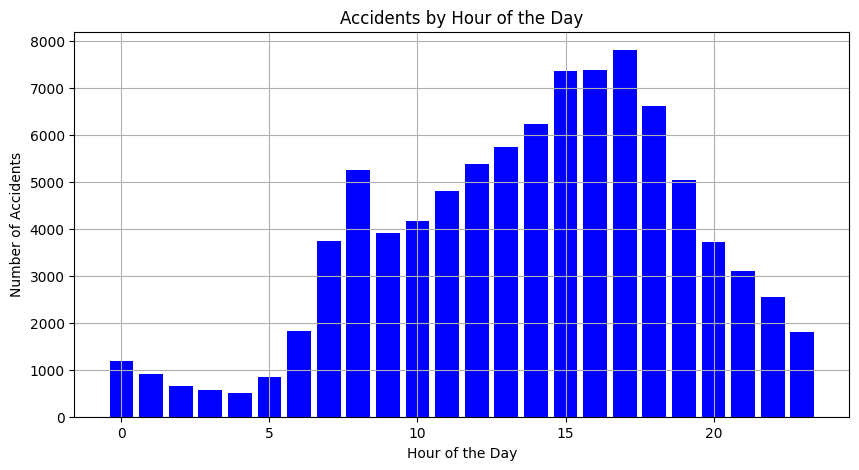

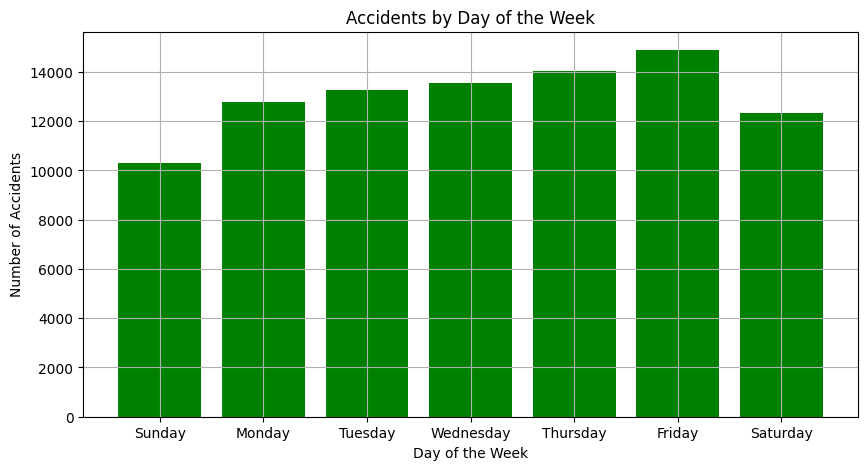

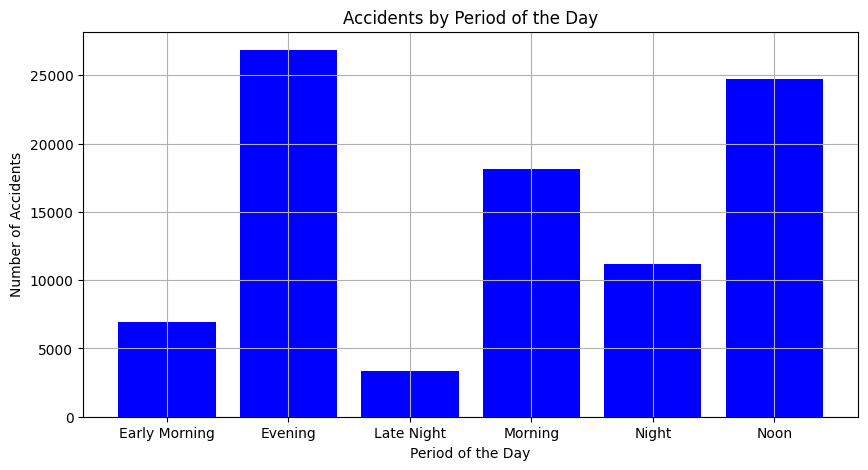

In [ ]:
import matplotlib.pyplot as plt



# Plotting hourly accidents
plt.figure(figsize=(10, 5))
plt.bar(hourly_accidents.index, hourly_accidents.values, color='blue')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 5))
plt.bar(days, day_of_week_accidents.values, color='green')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by period
plt.figure(figsize=(10, 5))
plt.bar(period_accidents.index, period_accidents.values, color='blue')
plt.title('Accidents by Period of the Day')
plt.xlabel('Period of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

From the visuals above it can be seen that most of the accidents in the dataset occur in the Evening(4pm - 7:59pm) and at Noon(12pm - 3:59pm) and Mornings(8am - 11:59am) this could be because of the owing to the fact that these are the busiest hours in terms of people going for and returning from work, school and other job related activities.. Also to note is that Friday has the most occurence of accidents with a noticable pattern of consistent increase in the occurence of accidents from sunday straight through to friday and then a drop on saturday.

Further Investigating the occurence of road accidents on friday

### In what area were accidents most frequent in the dataset:
The most intuitive answer would be that they would occur more in the urban city areas.

In [ ]:
label_mapping = {
    1: 'Urban',
    2: 'Rural'
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
accident_df['urb_rur']= accident_df.urban_or_rural_area.map(label_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
where = accident_df.groupby('urb_rur').size()
where

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


urb_rur
Rural    29446
Urban    61725
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


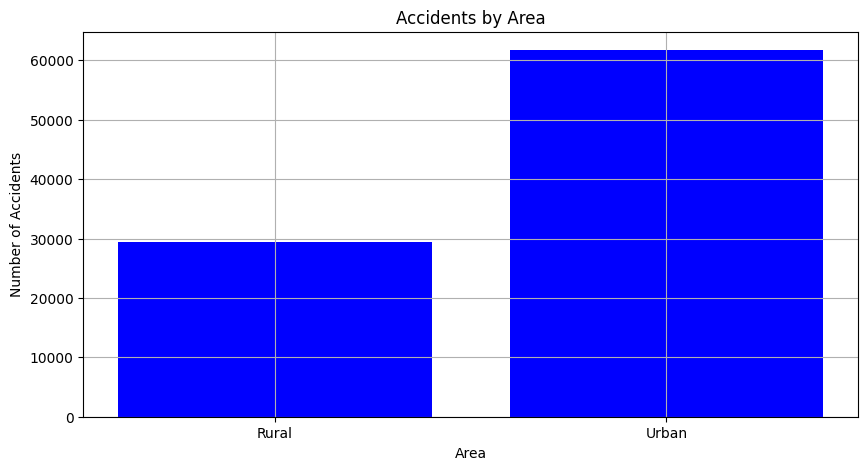

In [ ]:
# Plotting accidents by area
plt.figure(figsize=(10, 5))
plt.bar(where.index, where.values, color='blue')
plt.title('Accidents by Area')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

Apparently, they occur almost twice as much in urban than rural areas which is not suprising.

In [ ]:
# import folium

# # Assuming 'latitude' and 'longitude' are columns in your DataFrame
# # Create a base map
# m = folium.Map(location=[accident_df['latitude'].mean(), accident_df['longitude'].mean()], zoom_start=10)

# # Add markers for each accident
# for index, row in accident_df.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# # Save the map to an HTML file
# m.save('accident_map.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# # Display the map in the notebook
# from IPython.display import IFrame
# IFrame(src='accident_map.html', width=700, height=600)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## On what road type do accidents most frequently occur?

In [ ]:
road_mapping = {1:'Roundabout',2:'One way street'
,3:'Dual carriageway',6:'Single carriageway',7:'Slip road',9:'Unknown'
                }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
accident_df['road_type_map'] = accident_df.road_type.map(road_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
road_type = accident_df.groupby('road_type_map').size()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
accident_df['road_type_map'].value_counts(normalize = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Single carriageway    0.733918
Dual carriageway      0.144805
Roundabout            0.061193
Unknown               0.021959
One way street        0.021542
Slip road             0.016584
Name: road_type_map, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


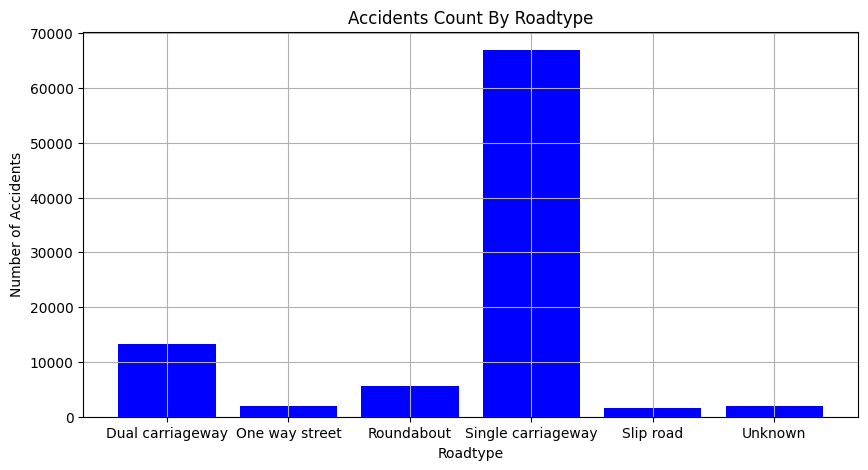

In [ ]:
# Plotting accidents by occurence on roadtype
plt.figure(figsize=(10, 5))
plt.bar(road_type.index, road_type.values, color='blue')
plt.title('Accidents Count By Roadtype')
plt.xlabel('Roadtype')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

In [ ]:
accident_df.drop('road_type_map', inplace = True, axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


From the visual above it is clearly see that more than 70% of accidents that occured in 2020 were on single carriageways(A single carriageway, also known as an undivided highway, is a type of road with a single roadway for vehicles traveling in both directions. It means that all traffic, regardless of direction, shares the same road surface, often separated by a painted line or a center median.)

### Age and Gender Distribution of Casualties

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


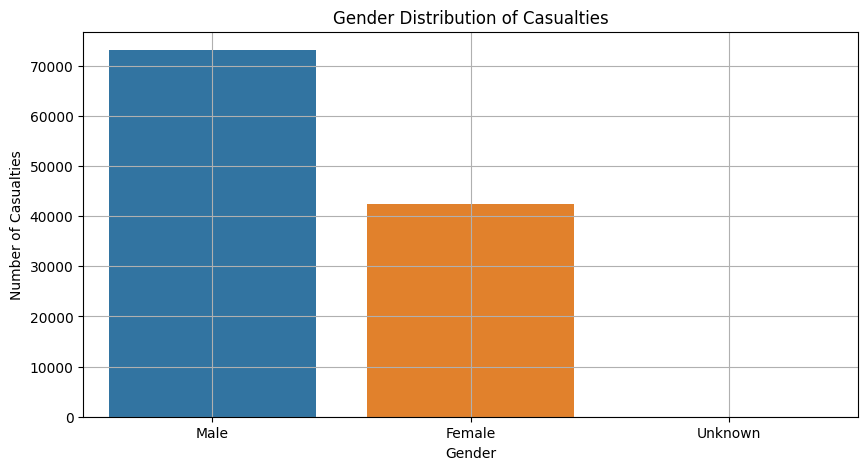

In [ ]:
import seaborn as sns
# Plotting gender distribution of casualties
plt.figure(figsize=(10, 5))
sns.countplot(data = casualty_df, x = 'sex_of_casualty')
plt.title('Gender Distribution of Casualties')
plt.xlabel('Gender')
plt.ylabel('Number of Casualties')
plt.grid(True)

xticks = ['Male','Female','Unknown']
positions = [0,1,2]
plt.xticks(positions, xticks)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


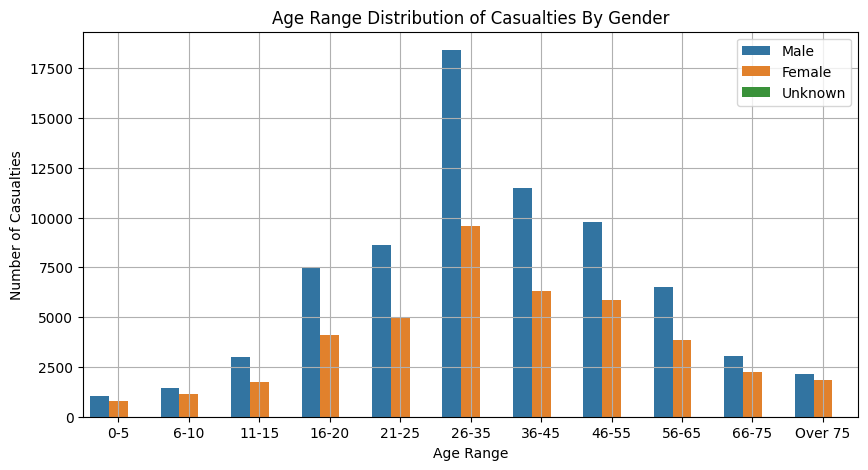

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(data = casualty_df, x= 'age_band_of_casualty', hue = 'sex_of_casualty')
plt.title('Age Range Distribution of Casualties By Gender')
plt.xlabel('Age Range')
plt.ylabel('Number of Casualties')
plt.grid(True)

xticks = ['0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','Over 75']
positions = [0,1,2,3,4,5,6,7,8,9,10]
plt.xticks(positions, xticks)
plt.legend(['Male','Female','Unknown'])
plt.show()

The charts show that there is clearly a large disparity in the ratio of men to women in terms of casualties. But one interesting thing observed is the spike in the number of casualties for men within the age band of 26-35.

### How Balanced is the Dataset in terms of the distribution of Accidents by severity?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


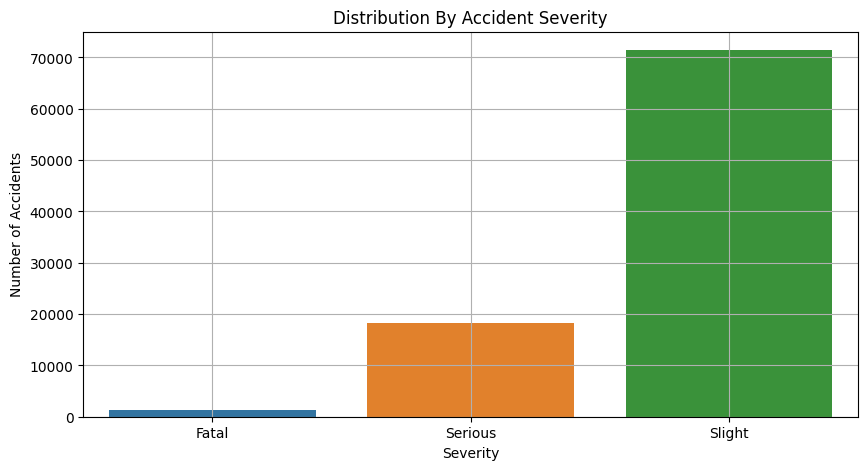

In [ ]:
# Plotting class distribution of casualties
plt.figure(figsize=(10, 5))
sns.countplot(data = accident_df, x = 'accident_severity')
plt.title('Distribution By Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.grid(True)

xticks = ['Fatal','Serious','Slight']
positions = [0,1,2]
plt.xticks(positions, xticks)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


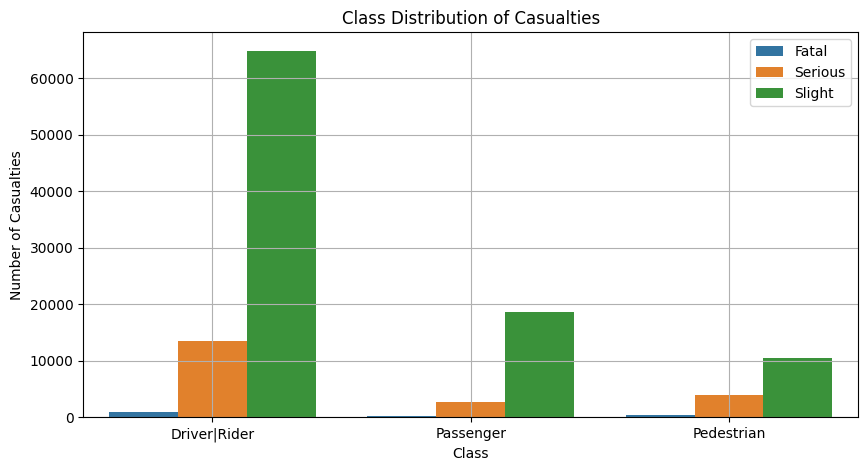

In [ ]:
# Plotting class distribution of casualties
plt.figure(figsize=(10, 5))
sns.countplot(data = casualty_df, x = 'casualty_class', hue = 'casualty_severity')
plt.title('Class Distribution of Casualties')
plt.xlabel('Class')
plt.ylabel('Number of Casualties')
plt.grid(True)

xticks = ['Driver|Rider','Passenger','Pedestrian']
positions = [0,1,2]
plt.xticks(positions, xticks)
plt.legend(['Fatal','Serious','Slight'])
plt.show()

The dataset is highly imbalanced with the severity type of **slight** being so much more than the **Serious** and **Fatal** types combined. And we can see this filter down to the class distribution of Casualties with a large proportion (approximately 68%) of casualties involving Drivers|riders with some of the casualties for the other classes being caused by these drivers|riders.

### Age and Gender Distribution of Drivers

In [ ]:
vehicle_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


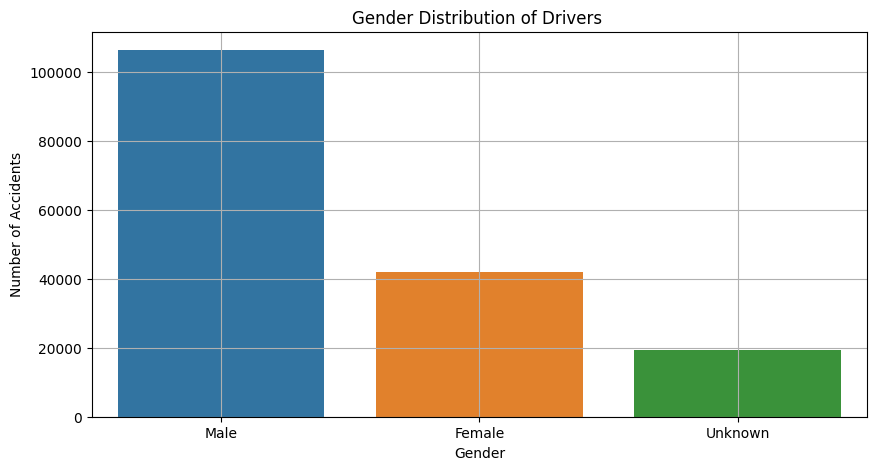

In [ ]:
# Plotting driver's gender distribution of accidents
plt.figure(figsize=(10, 5))
sns.countplot(data = vehicle_df, x = 'sex_of_driver')
plt.title('Gender Distribution of Drivers ')
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')
plt.grid(True)

xticks = ['Male','Female','Unknown']
positions = [0,1,2]
plt.xticks(positions, xticks)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


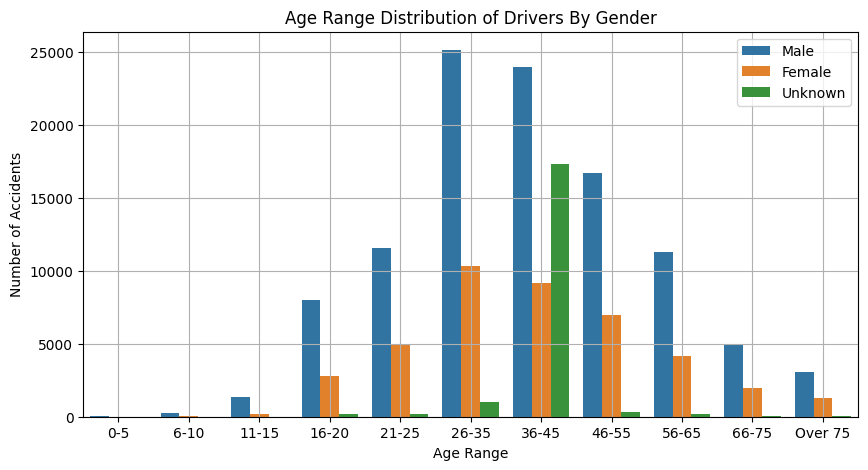

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(data = vehicle_df, x= 'age_band_of_driver', hue = 'sex_of_driver')
plt.title('Age Range Distribution of Drivers By Gender')
plt.xlabel('Age Range')
plt.ylabel('Number of Accidents')
plt.grid(True)

xticks = ['0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','Over 75']
positions = [0,1,2,3,4,5,6,7,8,9,10]
plt.xticks(positions, xticks)
plt.legend(['Male','Female','Unknown'])
plt.show()

The results add up seeing that a large proportion of casualties involved drivers and noticed the spike in the number of casualties within the age bracket of 26-35. We see the same play out here with most drivers involved in accidents within the ages of 26-35 and 36-45(the youthful population). Targeted campaigns towards this age range by the government could serve to reduce the number of accidents experienced.

# **Question 2**
For Motorbikes, are there significant hours of the day, days of the week, on which accidents occur?

In [ ]:
new = accident_df.merge(vehicle_df, how = 'left',on = 'accident_index')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### For motorcycles 125cc and under

In [ ]:
m125cc_under = new.query('(vehicle_type == 3) | (vehicle_type == 2)')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(f'Number of Accidents for For motorcycles 125cc and under : {m125cc_under.shape[0]}')

Number of Accidents for For motorcycles 125cc and under : 8650


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hour = m125cc_under.groupby('hour').size()
day_of_week_accidents = m125cc_under.groupby('day_of_week').size()
period_accidents = m125cc_under.groupby('Period').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


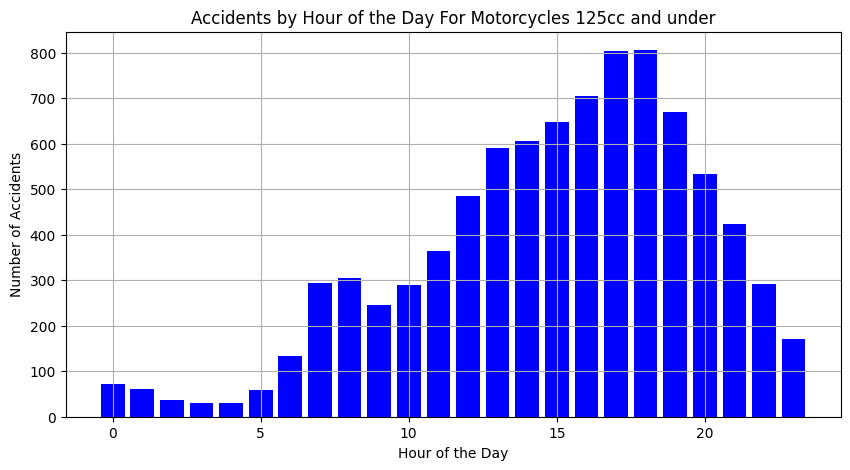

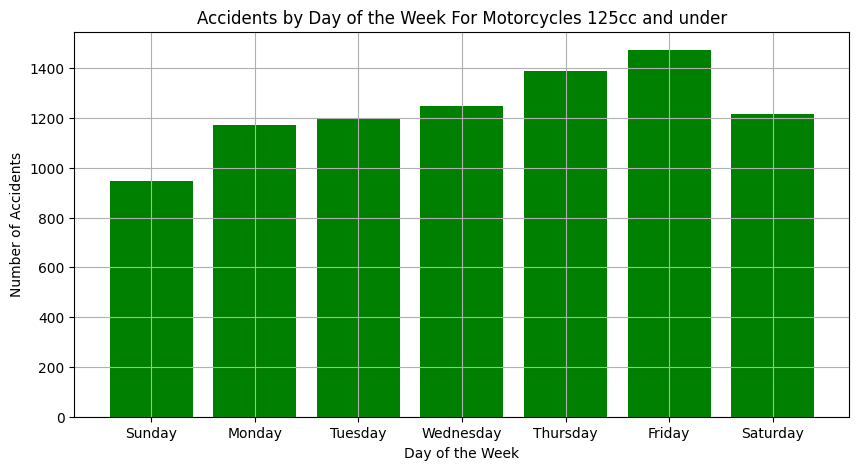

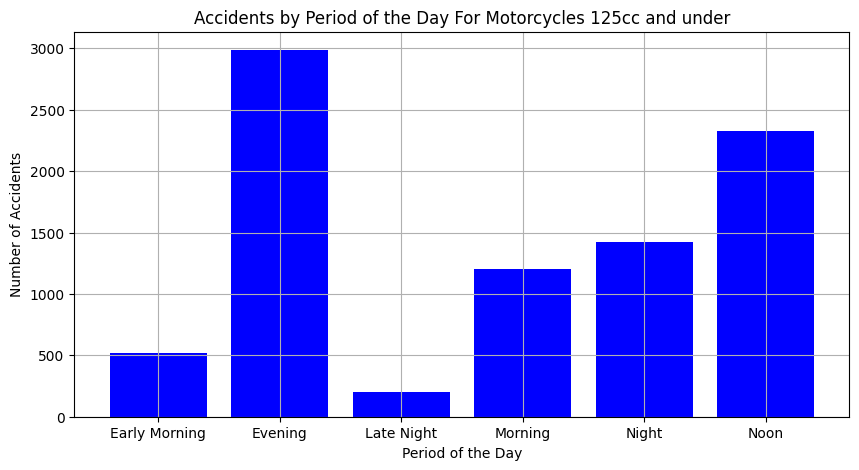

In [ ]:
# Plotting hourly accidents
plt.figure(figsize=(10, 5))
plt.bar(hour.index, hour.values, color='blue')
plt.title('Accidents by Hour of the Day For Motorcycles 125cc and under')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


# Plotting accidents by day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 5))
plt.bar(days, day_of_week_accidents.values, color='green')
plt.title('Accidents by Day of the Week For Motorcycles 125cc and under')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by period
plt.figure(figsize=(10, 5))
plt.bar(period_accidents.index, period_accidents.values, color='blue')
plt.title('Accidents by Period of the Day For Motorcycles 125cc and under')
plt.xlabel('Period of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

Thursdays and Fridays have the most occurence of accidents for Motorcycles 125cc and under, with the evenings and Noon also having the most occurences of accidents too.

### For motorcycles 125cc and up to 500cc

In [ ]:
m125cc_500cc = new.query('vehicle_type == 4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(f'Number of Accidents for motorcycles 125cc and up to 500cc: {m125cc_500cc.shape[0]}')

Number of Accidents for motorcycles 125cc and up to 500cc: 1691


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hour = m125cc_500cc.groupby('hour').size()
day_of_week_accidents = m125cc_500cc.groupby('day_of_week').size()
period_accidents = m125cc_500cc.groupby('Period').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


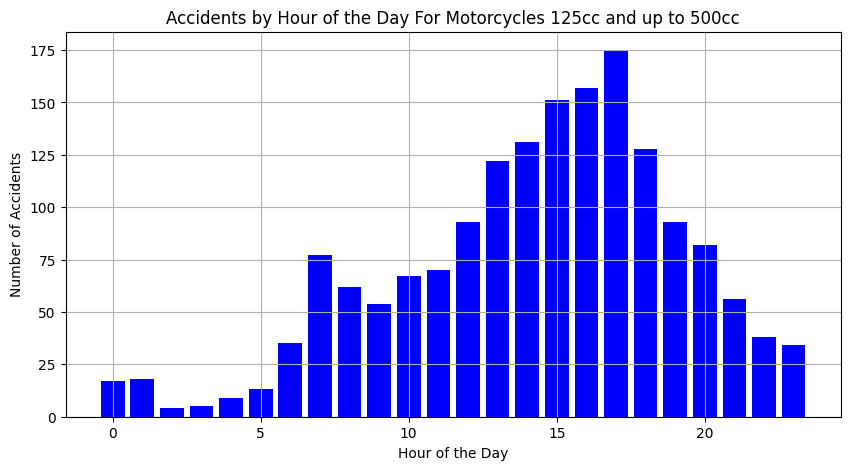

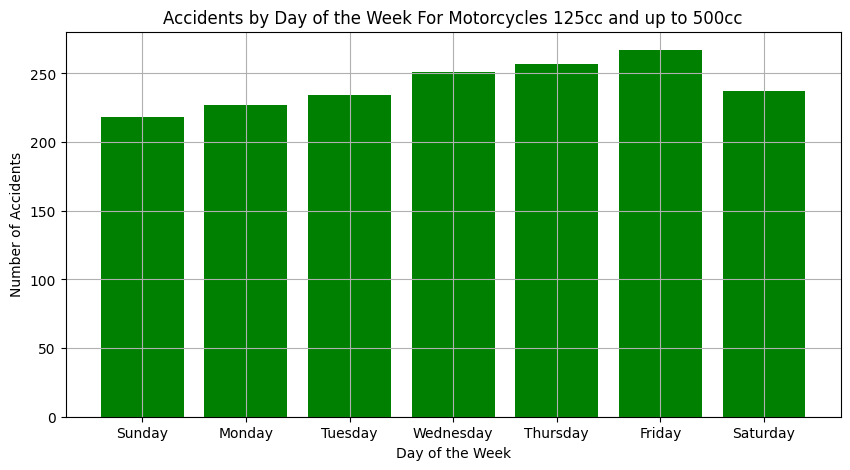

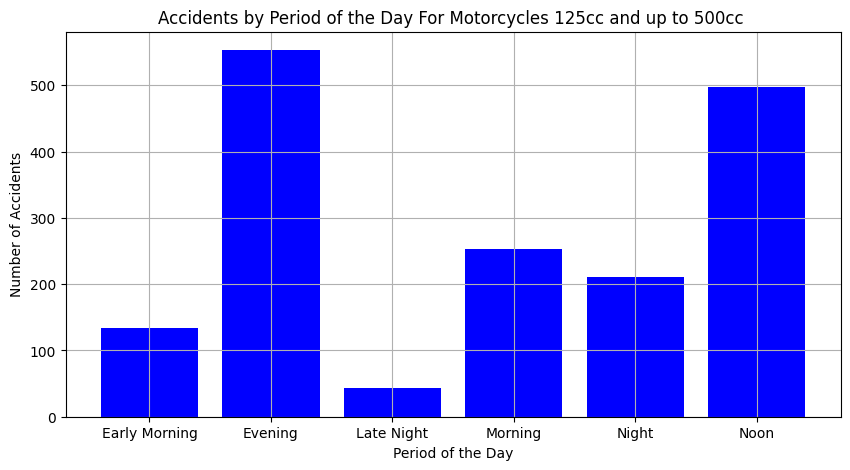

In [ ]:
# Plotting hourly accidents
plt.figure(figsize=(10, 5))
plt.bar(hour.index, hour.values, color='blue')
plt.title('Accidents by Hour of the Day For Motorcycles 125cc and up to 500cc')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 5))
plt.bar(days, day_of_week_accidents.values, color='green')
plt.title('Accidents by Day of the Week For Motorcycles 125cc and up to 500cc')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by period
plt.figure(figsize=(10, 5))
plt.bar(period_accidents.index, period_accidents.values, color='blue')
plt.title('Accidents by Period of the Day For Motorcycles 125cc and up to 500cc ')
plt.xlabel('Period of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


Far less accident occurence for motorcycles 125cc and up to 500cc(1691) as compared to motorcycles 125cc and under(8650). The same pattern observed for the overall dataset apparently filters down to this subset of the dataset with Friday seeing the most occurence of accidents and Noon and Evenigs also seeing the same.

### For motorcycles over 500cc

In [ ]:
m_over_500cc = new.query('vehicle_type == 5')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(f'Number of Accidents For motorcycles over 500cc: {m_over_500cc.shape[0]}')

Number of Accidents For motorcycles over 500cc: 3781


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hour = m_over_500cc.groupby('hour').size()
day_of_week_accidents = m_over_500cc.groupby('day_of_week').size()
period_accidents = m_over_500cc.groupby('Period').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


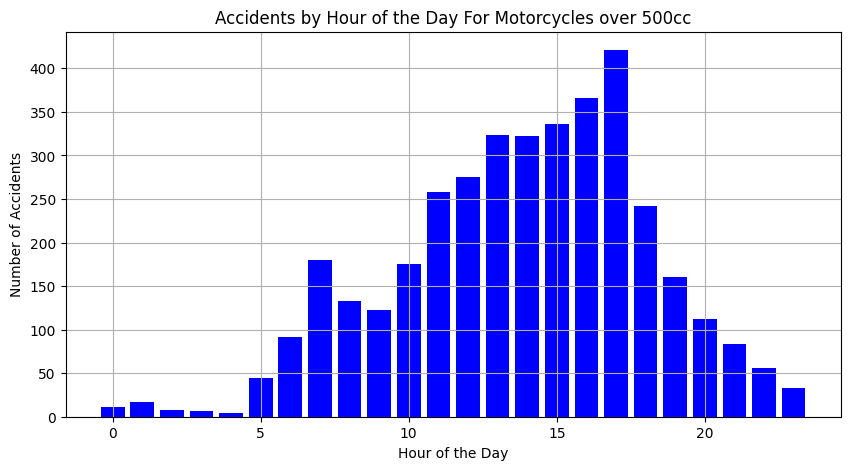

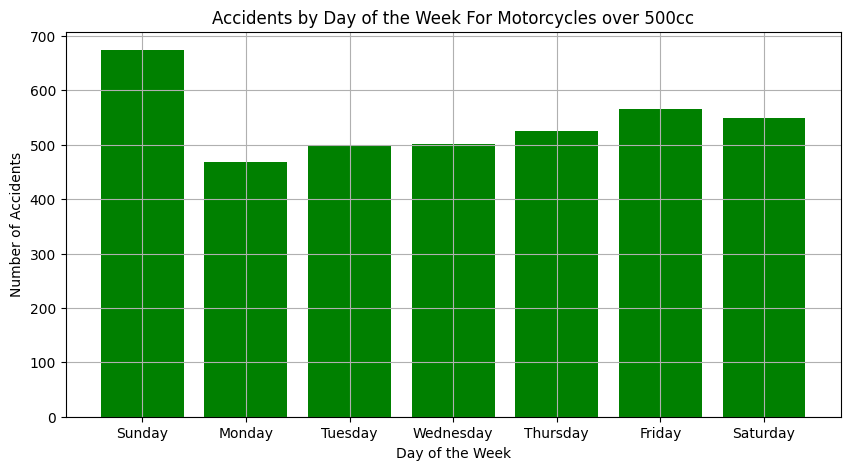

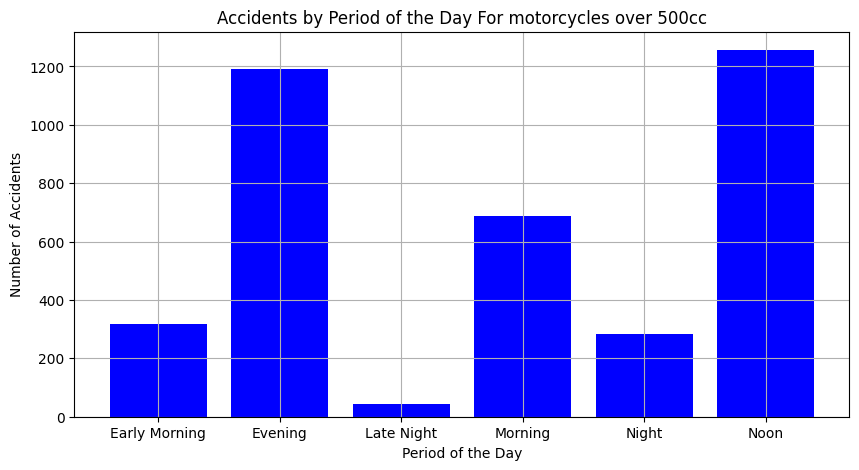

In [ ]:
# Plotting hourly accidents
plt.figure(figsize=(10, 5))
plt.bar(hour.index, hour.values, color='blue')
plt.title('Accidents by Hour of the Day For Motorcycles over 500cc')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 5))
plt.bar(days, day_of_week_accidents.values, color='green')
plt.title('Accidents by Day of the Week For Motorcycles over 500cc')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by period
plt.figure(figsize=(10, 5))
plt.bar(period_accidents.index, period_accidents.values, color='blue')
plt.title('Accidents by Period of the Day For motorcycles over 500cc')
plt.xlabel('Period of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

Clearly observed is that sundays have the most occurence of accidents for For motorcycles over 500cc which is a bit different from what was observed from the rest. Although, the have more observations for Noon and evenings remained consistent as observed with the other motorcycle types.

# Question 3
For Pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [ ]:
new = new.merge(casualty_df, how ='left', on = 'accident_index')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ped = new.query('casualty_class == 3')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hour = ped.groupby('hour').size()
day_of_week_accidents = ped.groupby('day_of_week').size()
ped_acc = ped.groupby('Period').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


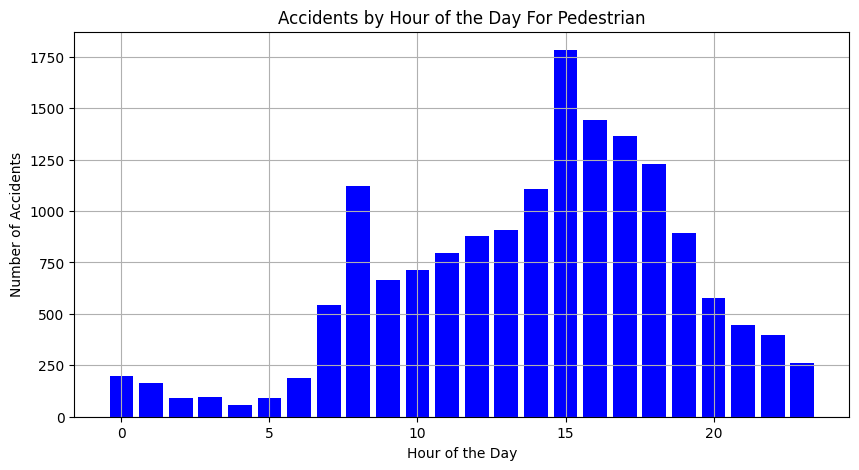

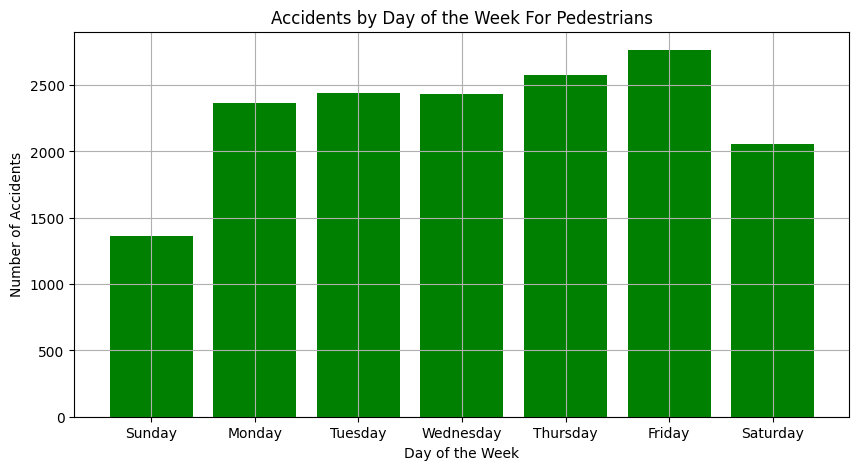

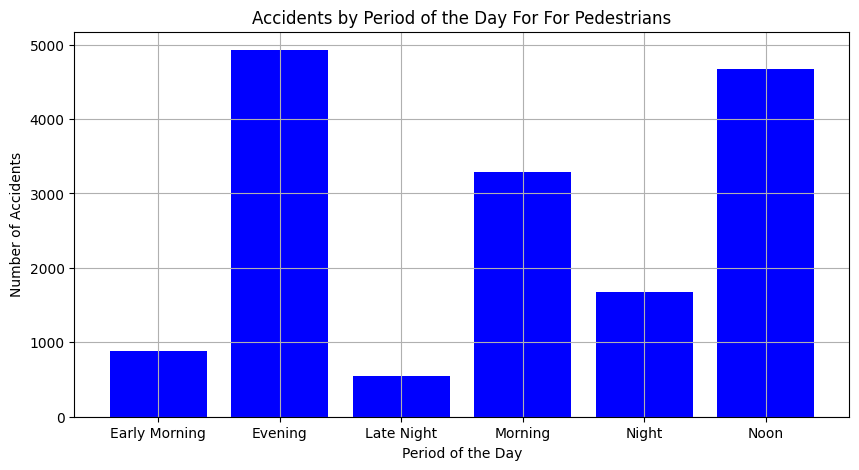

In [ ]:
# Plotting hourly accidents
plt.figure(figsize=(10, 5))
plt.bar(hour.index, hour.values, color='blue')
plt.title('Accidents by Hour of the Day For Pedestrian')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 5))
plt.bar(days, day_of_week_accidents.values, color='green')
plt.title('Accidents by Day of the Week For Pedestrians')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Plotting accidents by period
plt.figure(figsize=(10, 5))
plt.bar(ped_acc.index, ped_acc.values, color='blue')
plt.title('Accidents by Period of the Day For For Pedestrians')
plt.xlabel('Period of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

Pedestrians are more likey to be involved in accidents on Fridays as this is the start of the weekend and also seen is that the evenings and noon are also more likley times for them to be involved in accidents.

# Question 4
using the apriori algorithm, explore the impact of selected variables on accident severity.

In [ ]:
new.groupby('accident_severity').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accident_severity
1      4231
2     44821
3    171331
dtype: int64

Because of the imbalance in the dataset, a lot of the associations for accident severity that were fatal or serious are being neglected. And so, we will look at these subsets individually to try to draw out insightful relationships.

In [ ]:
fatal = new.query('accident_severity == 1')
serious = new.query('accident_severity == 2')
slight = new.query('accident_severity == 3')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'hour', 'Period',
       'urb_rur', 'vehicle_index', 'accident_year_y', 'accident_reference_y',
       'vehicle_reference_x', 'vehicle_type', 'towing_a

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

def perform_apriori(dataset):


    # Selecting columns for one-hot encoding
    columns_to_encode = ['accident_severity','number_of_vehicles',
         'road_type', 'speed_limit','weather_conditions',
         'vehicle_location_restricted_lane','skidding_and_overturning',
         'age_band_of_driver','age_of_vehicle','sex_of_driver','junction_location',
          'vehicle_manoeuvre', 'Period','engine_capacity_cc','day_of_week']

    # Looping through the columns to perform one-hot encoding
    for col in columns_to_encode:
        onehot_encoded = pd.get_dummies(dataset[col], prefix=col)

        # Joining the one-hot encoded column with the original DataFrame
        dataset = pd.concat([dataset, onehot_encoded], axis=1)

    # Selecting only the one-hot encoded columns
    df_onehot = dataset.filter(regex='accident_severity_|number_of_vehicles_|number_of_casualties_|road_type_|speed_limit_|light_conditions_|weather_conditions_|vehicle_type_|skidding_and_overturning_|age_of_driver_|age_of_vehicle_|casualty_class_')

    # Applying the Apriori algorithm
    freq_itemset = apriori(df_onehot, min_support=0.3, use_colnames=True)

    return freq_itemset
# Applying the process on each dataset
fatal_freq_itemset = perform_apriori(fatal)
serious_freq_itemset = perform_apriori(serious)
slight_freq_itemset = perform_apriori(slight)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

In [ ]:
def top(dataset):
  top_ten = dataset.sort_values('support',ascending = False).head(10)
  return top_ten

top_fatal = top(fatal_freq_itemset)
top_serious = top(serious_freq_itemset)
top_slight = top(slight_freq_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In the real world, many factors contribute to each distinct crash. Hence, it is likely to have several items in either the antecedent or consequent. The figure below visualizes the frequency of items. Overall, the top ten frequent items in each of the subsets are represented in the barchart below.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


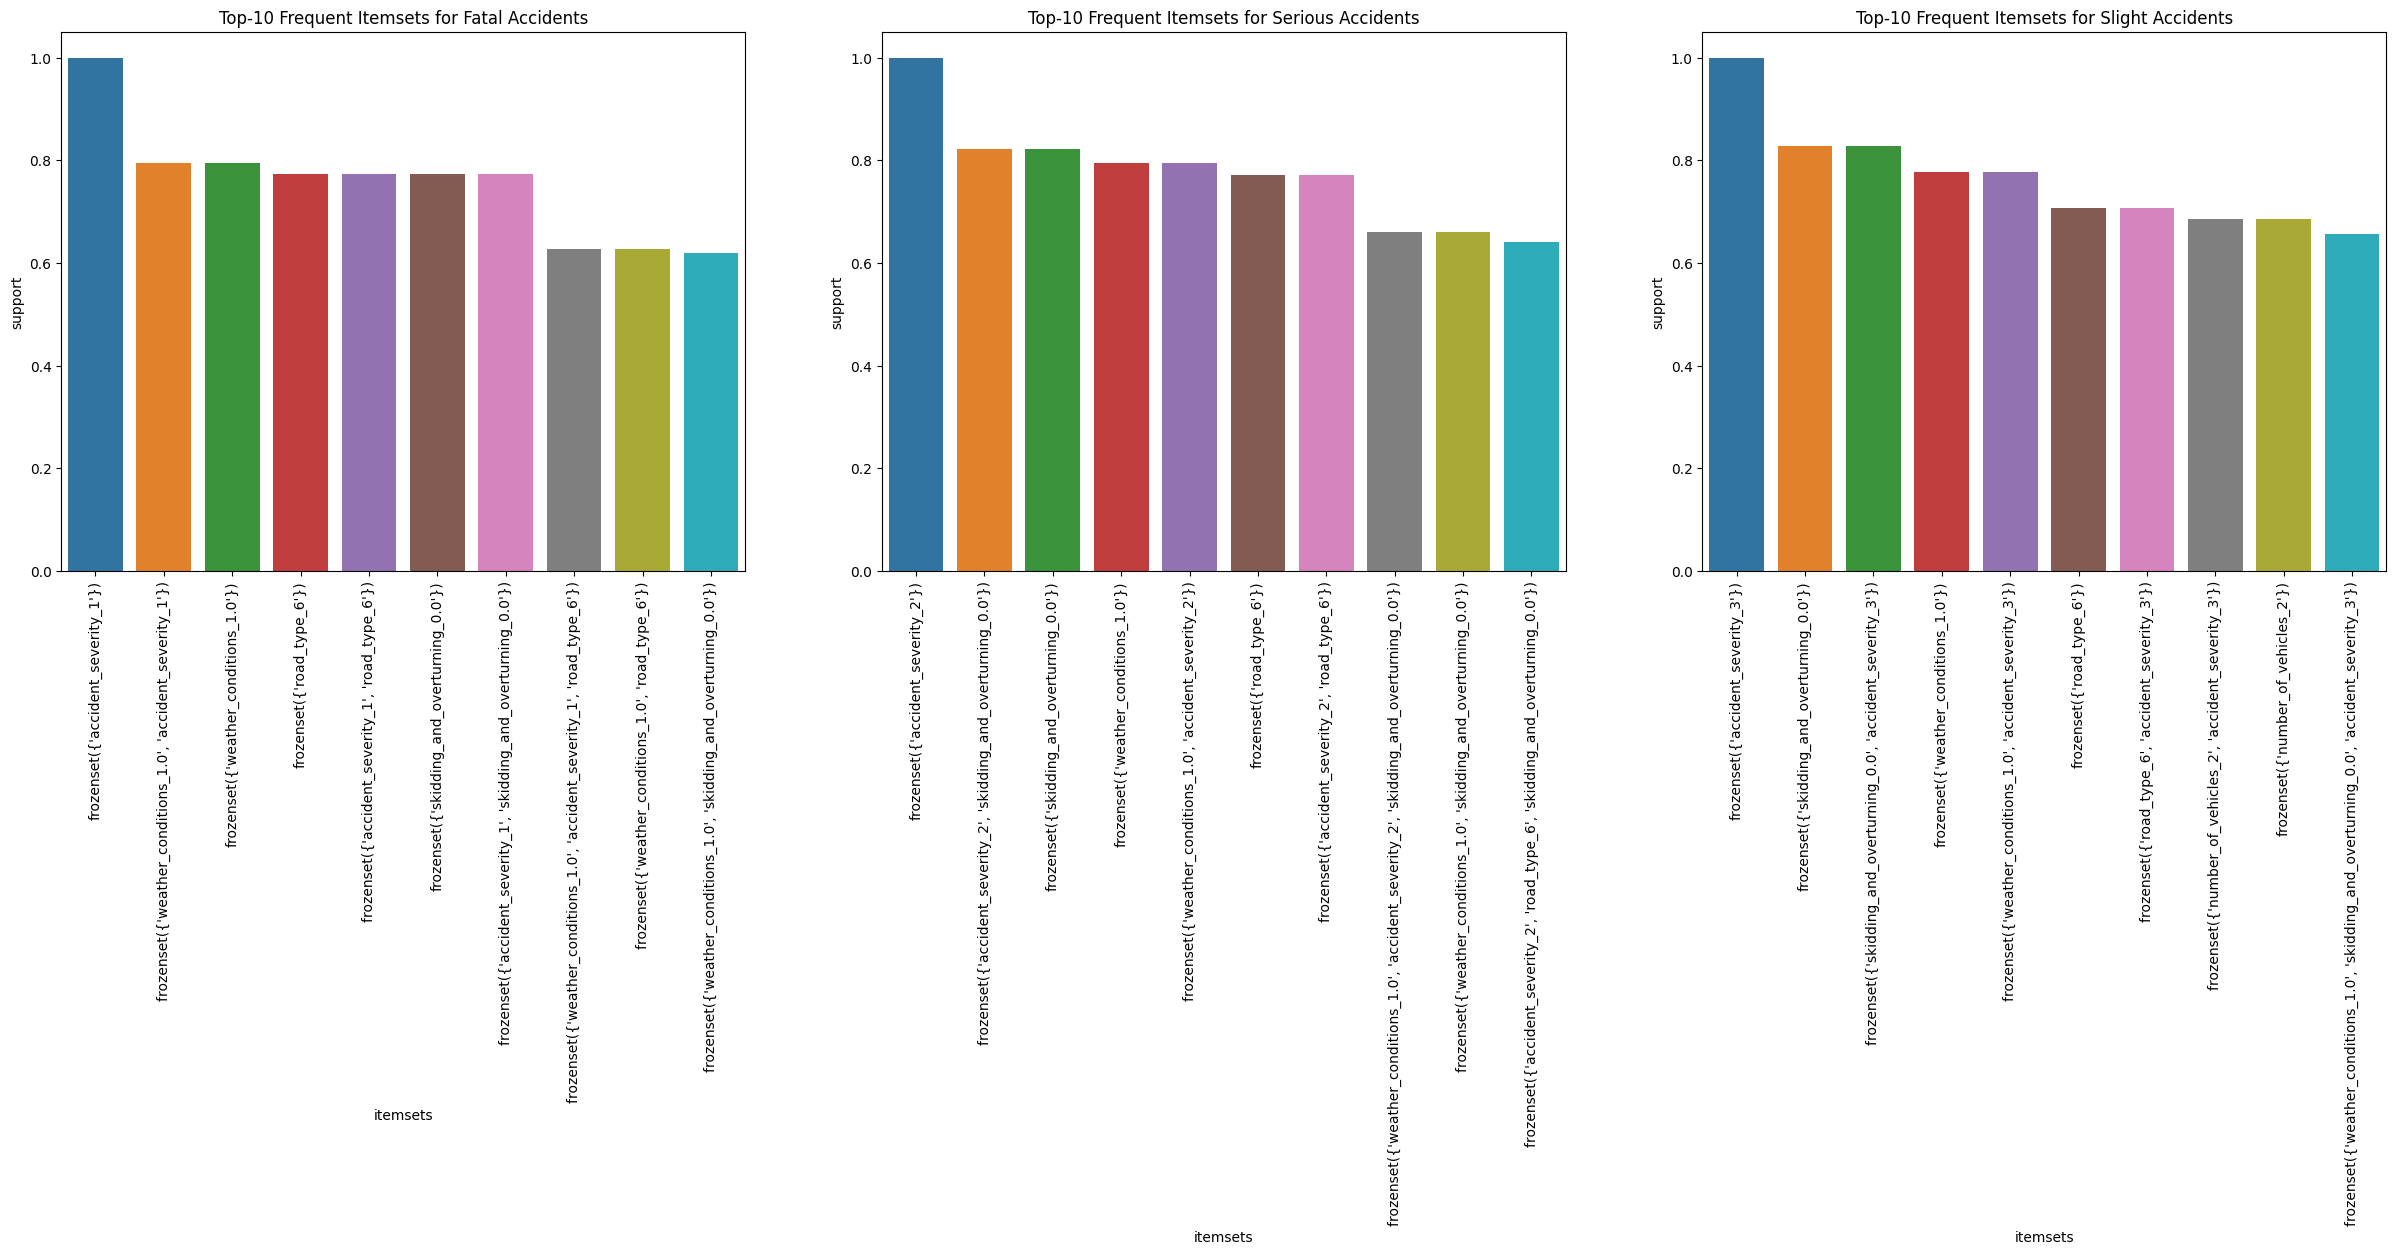

In [ ]:
import seaborn as sns
fig,ax = plt.subplots(1,3, figsize = (30,7))


sns.barplot(y = 'support', x = 'itemsets', data = top_fatal, ax = ax[0])
ax[0].set_title('Top-10 Frequent Itemsets for Fatal Accidents')

sns.barplot(y = 'support', x = 'itemsets', data = top_serious, ax = ax[1])
ax[1].set_title('Top-10 Frequent Itemsets for Serious Accidents')

sns.barplot(y = 'support', x = 'itemsets', data = top_slight, ax = ax[2])
ax[2].set_title('Top-10 Frequent Itemsets for Slight Accidents')


ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
plt.show()


In [ ]:
# define to apply rules to each of the subset created with a minimum lift of 1
def my_rules(dataset):
  rules = association_rules(dataset, metric = 'lift', min_threshold = 1)
  return rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fatal_rules = my_rules(fatal_freq_itemset)
serious_rules = my_rules(serious_freq_itemset)
slight_rules = my_rules(slight_freq_itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fatal_rules.sort_values(['lift','confidence'], ascending = [False, False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
73,(speed_limit_60.0),"(weather_conditions_1.0, road_type_6)",0.386433,0.626093,0.303711,0.785933,1.255297,0.061767,1.746679,0.331465
88,"(accident_severity_1, speed_limit_60.0)","(weather_conditions_1.0, road_type_6)",0.386433,0.626093,0.303711,0.785933,1.255297,0.061767,1.746679,0.331465
93,(speed_limit_60.0),"(weather_conditions_1.0, accident_severity_1, ...",0.386433,0.626093,0.303711,0.785933,1.255297,0.061767,1.746679,0.331465
68,"(weather_conditions_1.0, road_type_6)",(speed_limit_60.0),0.626093,0.386433,0.303711,0.485089,1.255297,0.061767,1.191597,0.543921
80,"(weather_conditions_1.0, accident_severity_1, ...",(speed_limit_60.0),0.626093,0.386433,0.303711,0.485089,1.255297,0.061767,1.191597,0.543921
...,...,...,...,...,...,...,...,...,...,...
39,(accident_severity_1),"(number_of_vehicles_2, skidding_and_overturnin...",1.000000,0.341054,0.341054,0.341054,1.000000,0.000000,1.000000,0.000000
34,(accident_severity_1),"(weather_conditions_1.0, number_of_vehicles_2)",1.000000,0.337036,0.337036,0.337036,1.000000,0.000000,1.000000,0.000000
27,(accident_severity_1),"(number_of_vehicles_2, road_type_6)",1.000000,0.328528,0.328528,0.328528,1.000000,0.000000,1.000000,0.000000
60,(accident_severity_1),"(weather_conditions_1.0, speed_limit_60.0)",1.000000,0.322855,0.322855,0.322855,1.000000,0.000000,1.000000,0.000000


Association: Accidents with a speed limit of 60 km/h and fatal severity are more likely to occur on single carriageways under fine weather conditions.



Potential Solutions:
- Enhanced Signage and Warning Systems: Install clear and prominent signs indicating the speed limit of 60 km/h on single carriageways. Additionally, consider using electronic message signs to alert drivers about the speed limit and road conditions.
- Traffic Calming Measures: Implement traffic calming measures such as speed bumps, chicanes, or roundabouts to naturally slow down vehicles and improve safety on single carriageways.

In [ ]:
serious_rules.sort_values(['lift','confidence'], ascending = [False, False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
110,(speed_limit_30.0),"(road_type_6, skidding_and_overturning_0.0)",0.482609,0.639901,0.357556,0.740881,1.157806,0.048734,1.389706,0.263432
188,"(accident_severity_2, speed_limit_30.0)","(road_type_6, skidding_and_overturning_0.0)",0.482609,0.639901,0.357556,0.740881,1.157806,0.048734,1.389706,0.263432
193,(speed_limit_30.0),"(accident_severity_2, road_type_6, skidding_an...",0.482609,0.639901,0.357556,0.740881,1.157806,0.048734,1.389706,0.263432
107,"(road_type_6, skidding_and_overturning_0.0)",(speed_limit_30.0),0.639901,0.482609,0.357556,0.558767,1.157806,0.048734,1.172604,0.378500
180,"(accident_severity_2, road_type_6, skidding_an...",(speed_limit_30.0),0.639901,0.482609,0.357556,0.558767,1.157806,0.048734,1.172604,0.378500
...,...,...,...,...,...,...,...,...,...,...
135,(accident_severity_2),"(weather_conditions_1.0, number_of_vehicles_2,...",1.000000,0.375538,0.375538,0.375538,1.000000,0.000000,1.000000,0.000000
191,(accident_severity_2),"(road_type_6, speed_limit_30.0, skidding_and_o...",1.000000,0.357556,0.357556,0.357556,1.000000,0.000000,1.000000,0.000000
219,(accident_severity_2),"(weather_conditions_1.0, speed_limit_30.0, ski...",1.000000,0.339841,0.339841,0.339841,1.000000,0.000000,1.000000,0.000000
177,(accident_severity_2),"(weather_conditions_1.0, road_type_6, speed_li...",1.000000,0.331496,0.331496,0.331496,1.000000,0.000000,1.000000,0.000000


Association: Accidents with a speed limit of 30 km/h resulting in serious injuries are more likely to occur on single carriageways, and there is no skidding, jack-knifing, or overturning involved.

Real-World Interpretation: This association indicates that accidents with a speed limit of 30 km/h resulting in serious injuries are more likely to occur on single carriageways without skidding, jack-knifing, or overturning.

Potential Solution: Given the severity of these accidents, it's crucial to intensify efforts to enhance safety measures on roads with a 30 km/h speed limit, especially on single carriageways. This could include implementing additional traffic calming measures, improving road signage and visibility, and conducting targeted awareness campaigns to encourage safe driving practices.

In [ ]:
slight_rules.sort_values(['lift','confidence'], ascending = [False,False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
306,"(road_type_6, skidding_and_overturning_0.0)","(weather_conditions_1.0, speed_limit_30.0)",0.600481,0.443843,0.318950,0.531157,1.196725,0.052431,1.186235,0.411459
356,"(road_type_6, skidding_and_overturning_0.0, ac...","(weather_conditions_1.0, speed_limit_30.0)",0.600481,0.443843,0.318950,0.531157,1.196725,0.052431,1.186235,0.411459
364,"(road_type_6, skidding_and_overturning_0.0)","(weather_conditions_1.0, speed_limit_30.0, acc...",0.600481,0.443843,0.318950,0.531157,1.196725,0.052431,1.186235,0.411459
303,"(weather_conditions_1.0, speed_limit_30.0)","(road_type_6, skidding_and_overturning_0.0)",0.443843,0.600481,0.318950,0.718610,1.196725,0.052431,1.419807,0.295574
349,"(weather_conditions_1.0, speed_limit_30.0, acc...","(road_type_6, skidding_and_overturning_0.0)",0.443843,0.600481,0.318950,0.718610,1.196725,0.052431,1.419807,0.295574
...,...,...,...,...,...,...,...,...,...,...
213,(accident_severity_3),"(number_of_vehicles_2, speed_limit_30.0, skidd...",1.000000,0.348734,0.348734,0.348734,1.000000,0.000000,1.000000,0.000000
341,(accident_severity_3),"(weather_conditions_1.0, number_of_vehicles_2,...",1.000000,0.330652,0.330652,0.330652,1.000000,0.000000,1.000000,0.000000
371,(accident_severity_3),"(weather_conditions_1.0, road_type_6, speed_li...",1.000000,0.318950,0.318950,0.318950,1.000000,0.000000,1.000000,0.000000
199,(accident_severity_3),"(weather_conditions_1.0, number_of_vehicles_2,...",1.000000,0.318331,0.318331,0.318331,1.000000,0.000000,1.000000,0.000000


Association: Accidents on single carriageways, with no skidding, jack-knifing, or overturning, resulting in serious injuries, and occurring in fine weather conditions with a speed limit of 30 km/h, are 1.19 times more likely compared to accidents in other conditions.

Real-World Interpretation: This association indicates that accidents on single carriageways, without skidding, jack-knifing, or overturning, resulting in serious injuries, and occurring in fine weather conditions with a speed limit of 30 km/h, are more frequent.

Potential Solution: Given the severity of these accidents, it's crucial to intensify efforts to enhance safety measures on roads with a 30 km/h speed limit, especially on single carriageways. This could include implementing additional traffic calming measures, improving road signage and visibility, and conducting targeted awareness campaigns to encourage safe driving practices.

# Question 5
Identify accidents in Kingston upon Hull, Humberside,and East Riding of Yorkshire. Run clustering on this Data. What do these clusters reveal about the distribution of accidents in these regions?

In [ ]:
#creating a subset of the dataset with only these locations
locations = new.query('(local_authority_district == 228) | (local_authority_district == 231) | (police_force == 16 )')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
locations.drop(list(locations.select_dtypes(include = 'object').columns), axis = 1, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-97-54d069f64cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations.drop(list(locations.select_dtypes(include = 'object').columns), axis = 1, inplace = True)


In [ ]:
locations.drop(['time','casualty_index','vehicle_index','latitude','longitude',
                'vehicle_reference_x','vehicle_reference_y','accident_year_x',
                'accident_year_y'],axis = 1, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-98-664e822851a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations.drop(['time','casualty_index','vehicle_index','latitude','longitude',


In [ ]:
locations = locations[['towing_and_articulation','vehicle_manoeuvre',
                    'vehicle_location_restricted_lane','junction_location','skidding_and_overturning',
                    'hit_object_in_carriageway','vehicle_left_hand_drive','sex_of_driver',
                    'age_of_driver','age_band_of_driver','engine_capacity_cc','age_of_vehicle',
                    'driver_imd_decile','driver_home_area_type','carriageway_hazards','road_surface_conditions','weather_conditions',
                  'road_type','speed_limit','number_of_vehicles','day_of_week']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for each in list(locations.isnull().sum()[locations.isnull().sum() > 0].index):

  locations[each].fillna(locations[each].median(),inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_standardized = scaler.fit_transform(locations)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.cluster import KMeans

# Assuming 'X' is your feature matrix

# Initialize the KMeans algorithm with the desired number of clusters (k)
kmeans = KMeans(n_clusters=4)  # You can change the number of clusters as needed

# Fit the KMeans model to your data
kmeans.fit(locations)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Optionally, you can get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

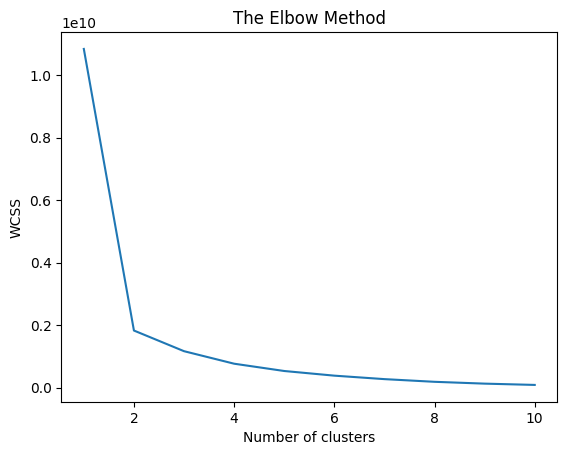

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                random_state = 42)
    kmeans.fit(locations)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
y_pred = kmeans.predict(locations)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(locations,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6955353477632389

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


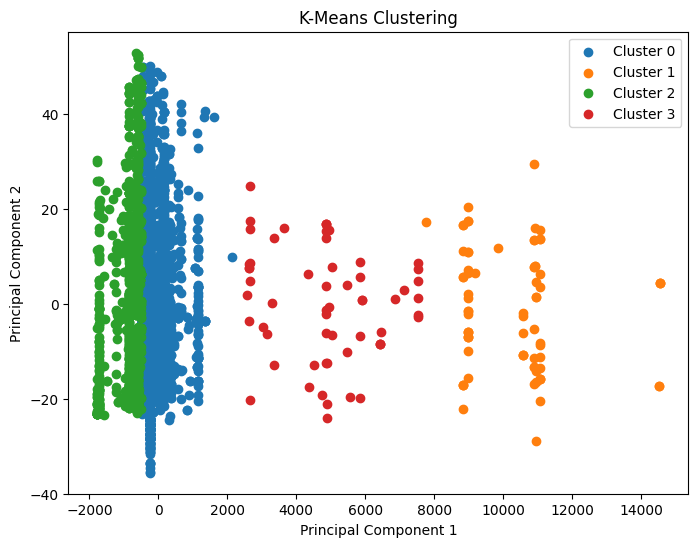

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X' is your feature matrix and 'cluster_assignments' is the cluster labels

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=len(locations.columns))
X_2d = pca.fit_transform(locations)

# Scatter plot the data points with color-coded clusters
plt.figure(figsize=(8, 6))

for i in range(len(set(cluster_assignments))):
    plt.scatter(X_2d[cluster_assignments == i, 0], X_2d[cluster_assignments == i, 1], label=f'Cluster {i}')

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


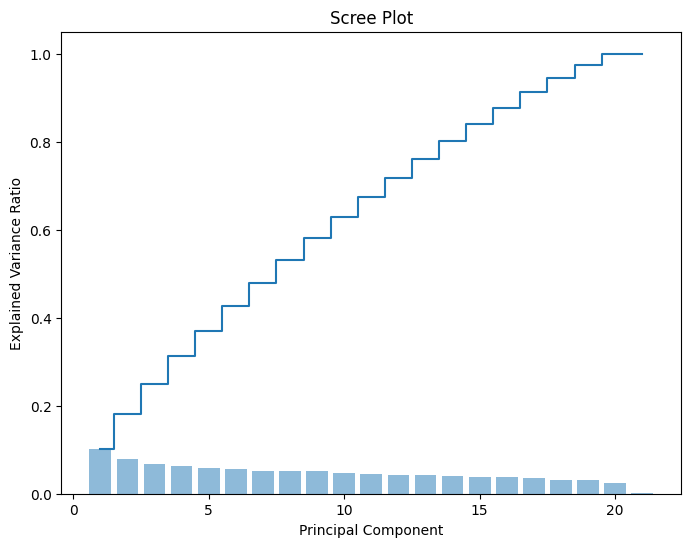

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X' is your feature matrix
# X should be standardized (mean=0, std=1) before applying PCA

# Initialize PCA with the desired number of components
num_components = len(locations.columns) # Adjust as needed
pca = PCA(n_components=num_components)

# Fit PCA to your data
pca.fit(X_standardized)

# Get the principal components (eigenvectors)
principal_components = pca.components_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Select the desired number of components based on the scree plot



In [ ]:
explained_variance_ratio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.10153149, 0.07945752, 0.06761876, 0.06332663, 0.05891126,
       0.05538619, 0.05266055, 0.05176026, 0.05078577, 0.04647089,
       0.04562323, 0.04329593, 0.04299862, 0.04110459, 0.03907542,
       0.03732983, 0.03551568, 0.03092514, 0.03026486, 0.02483348,
       0.00112389])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


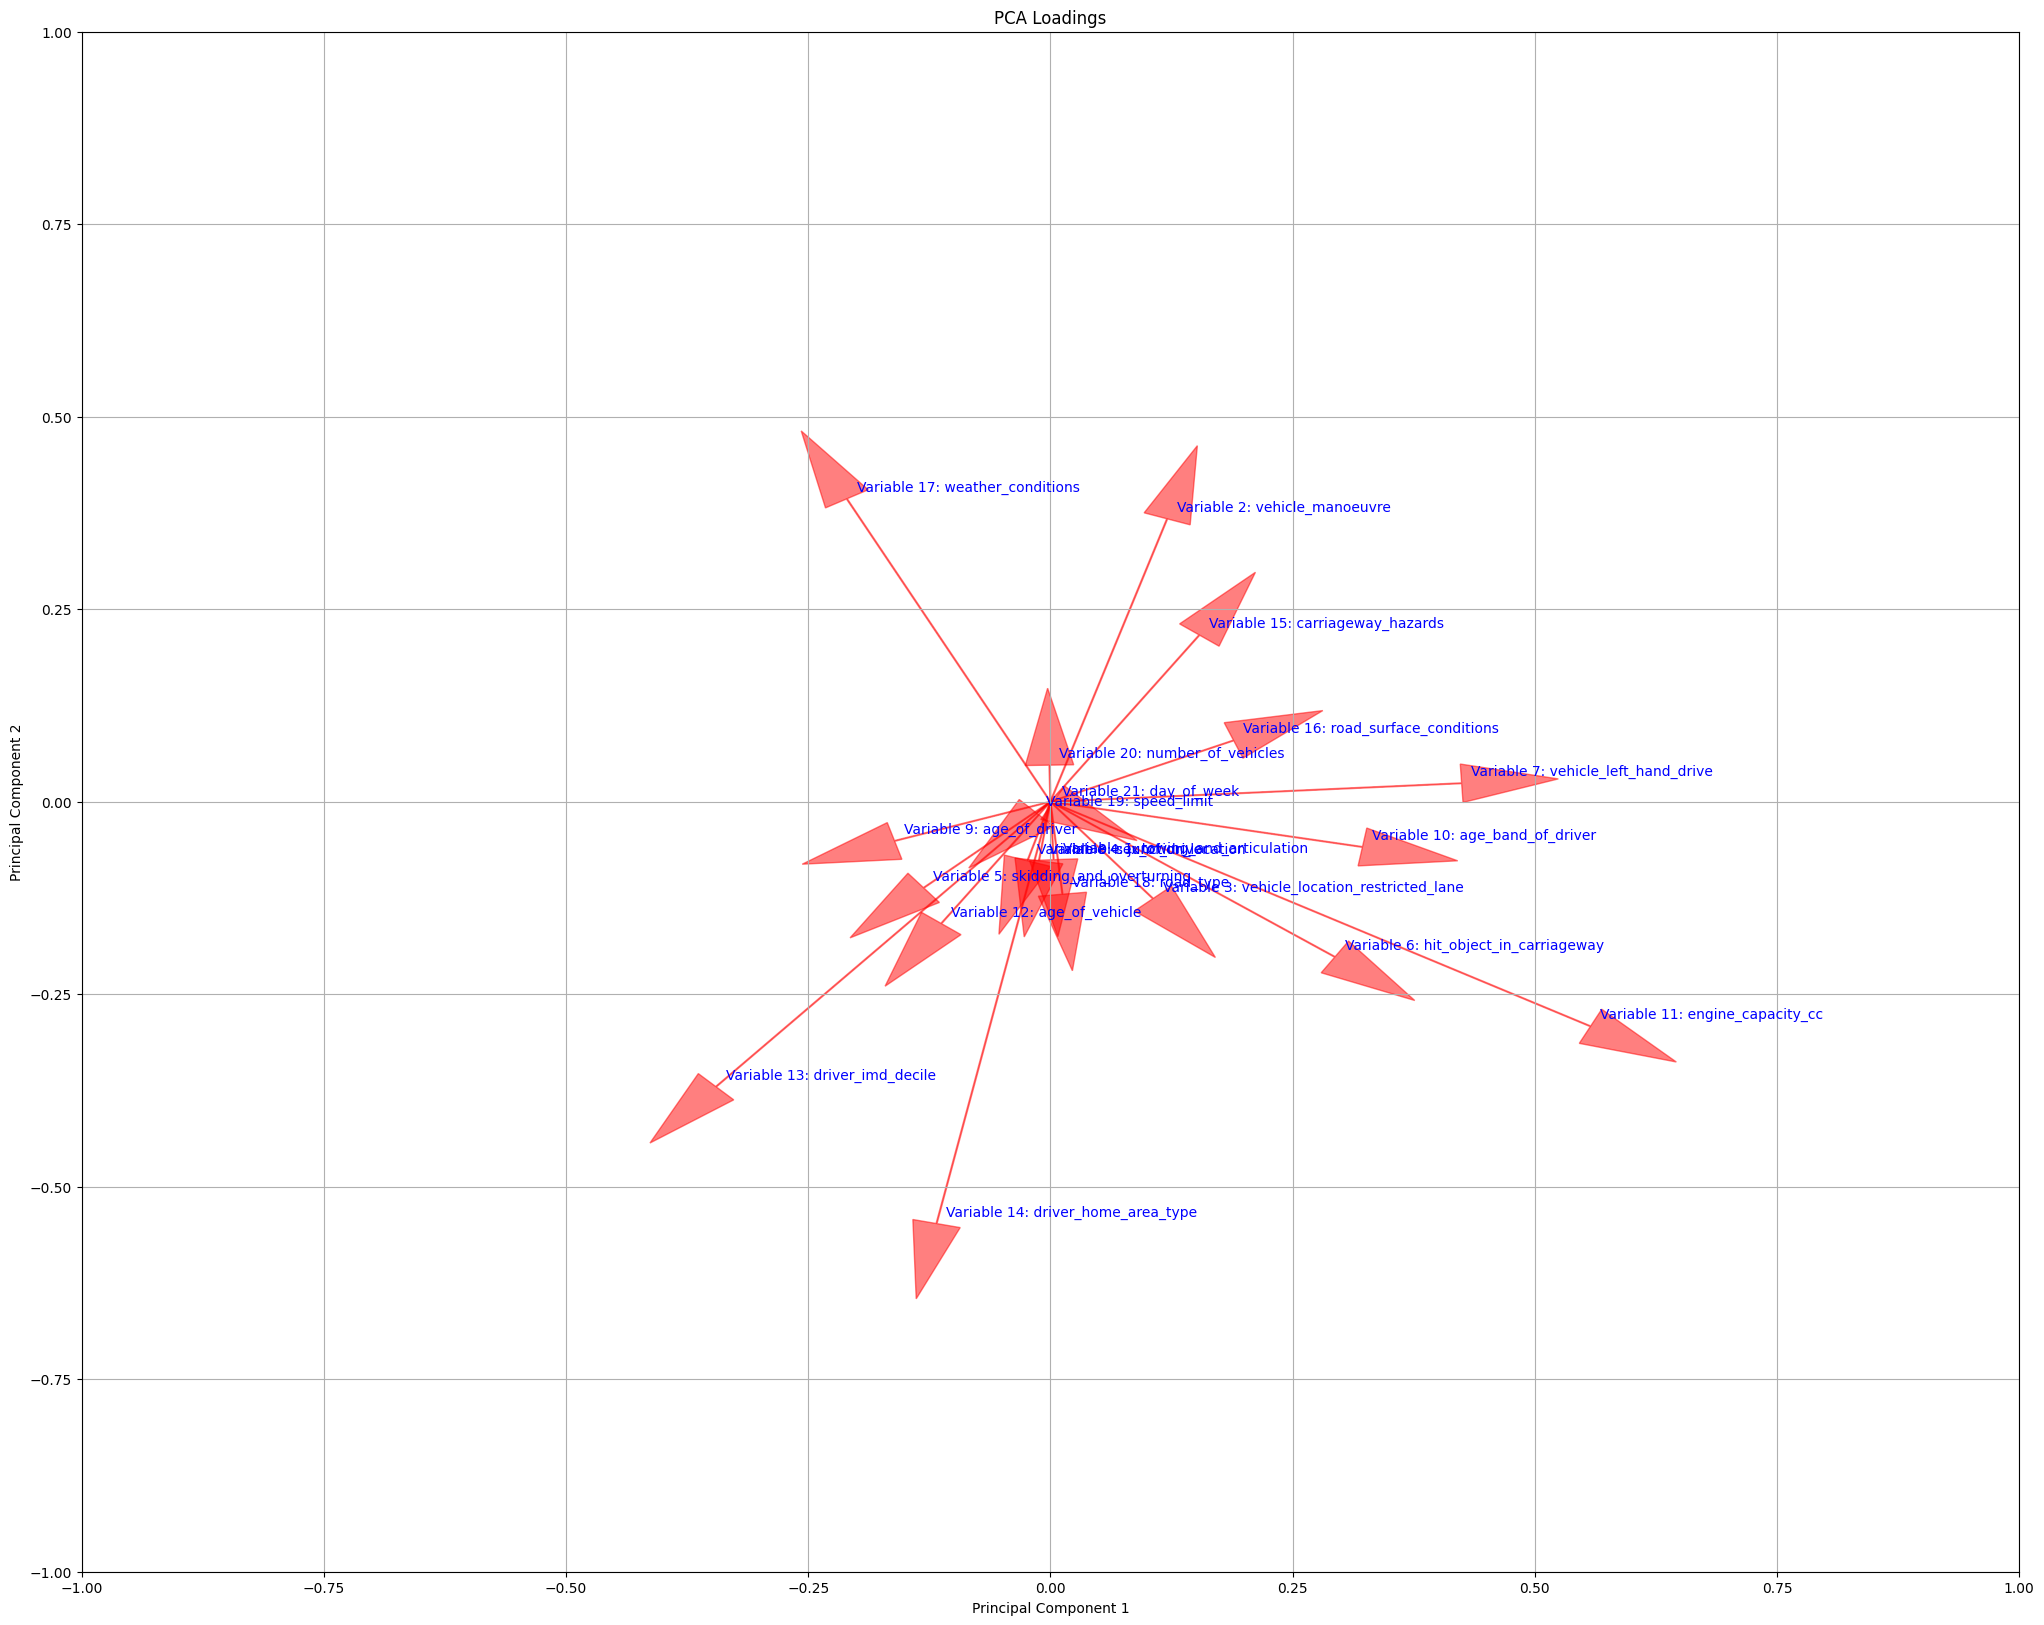

In [ ]:
# Visualize loadings with variable names labeled
plt.figure(figsize=(25,20))
for i, (pc, var_name) in enumerate(zip(principal_components, locations.columns)):
    plt.arrow(0, 0, pc[0], pc[1], head_width=0.05, head_length=0.1, color='r', alpha=0.5)
    plt.text(pc[0] + 0.01, pc[1] + 0.01, f'Variable {i+1}: {var_name}', color='b', fontsize=10)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('PCA Loadings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [ ]:
# Get the loadings for PC1
loadings_pc1 = pca.components_[0]

# Create a DataFrame to associate loadings with feature names
loadings_df = pd.DataFrame(loadings_pc1, index=locations.columns, columns=['Loading_PC1'])

# Sort by absolute value to identify the most influential features
loadings_df['Absolute_Loading_PC1'] = abs(loadings_df['Loading_PC1'])
sorted_loadings = loadings_df.sort_values(by='Absolute_Loading_PC1', ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sorted_loadings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Loading_PC1,Absolute_Loading_PC1
age_of_driver,0.632794,0.632794
age_band_of_driver,0.629936,0.629936
driver_home_area_type,0.283445,0.283445
driver_imd_decile,0.252931,0.252931
speed_limit,0.139809,0.139809
engine_capacity_cc,0.128064,0.128064
vehicle_manoeuvre,-0.075282,0.075282
skidding_and_overturning,-0.068250,0.068250
age_of_vehicle,-0.061478,0.061478
vehicle_location_restricted_lane,-0.058387,0.058387


In [ ]:
# Get the loadings for PC1
loadings_pc1 = pca.components_[1]

# Create a DataFrame to associate loadings with feature names
loadings_df = pd.DataFrame(loadings_pc1, index=locations.columns, columns=['Loading_PC1'])

# Sort by absolute value to identify the most influential features
loadings_df['Absolute_Loading_PC1'] = abs(loadings_df['Loading_PC1'])
sorted_loadings = loadings_df.sort_values(by='Absolute_Loading_PC1', ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sorted_loadings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Loading_PC1,Absolute_Loading_PC1
speed_limit,0.497034,0.497034
vehicle_manoeuvre,0.367393,0.367393
skidding_and_overturning,0.342326,0.342326
sex_of_driver,-0.322515,0.322515
number_of_vehicles,-0.306639,0.306639
driver_home_area_type,0.291075,0.291075
carriageway_hazards,0.250418,0.250418
road_surface_conditions,0.171272,0.171272
hit_object_in_carriageway,0.167211,0.167211
towing_and_articulation,0.120525,0.120525


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


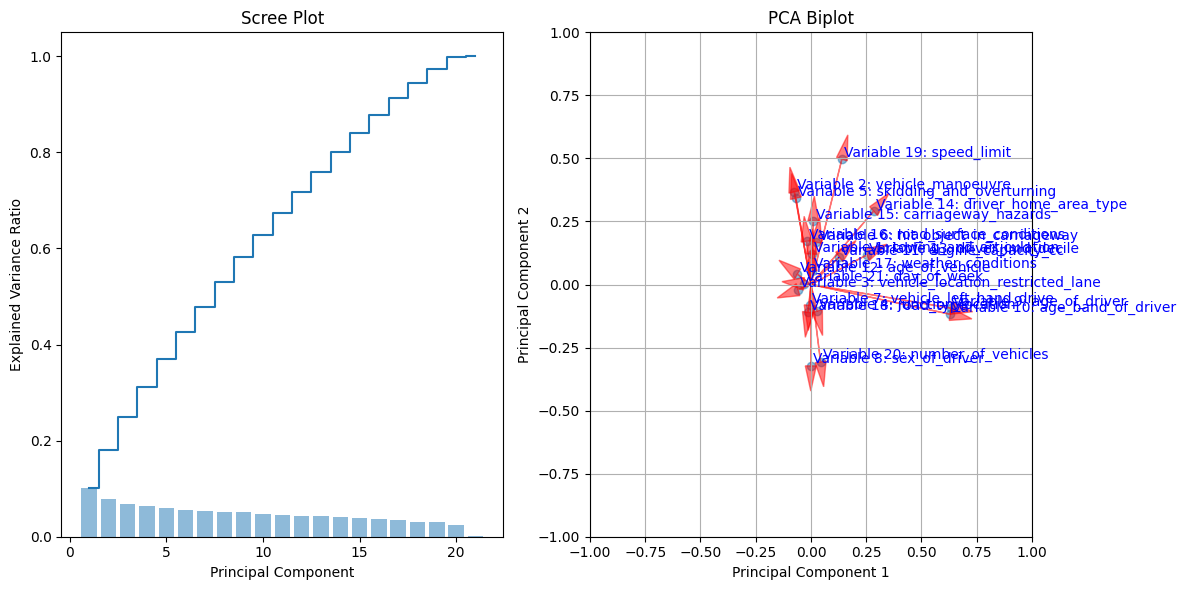

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X' is your feature matrix
# X should be standardized (mean=0, std=1) before applying PCA

# Initialize PCA with the desired number of components
num_components = len(locations.columns) # Adjust as needed
pca = PCA(n_components=num_components)

# Fit PCA to your data
pca.fit(X_standardized)

# Get the principal components (eigenvectors)
principal_components = pca.components_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Select the desired number of components based on the scree plot

# Biplot
plt.subplot(122)
plt.scatter(principal_components[0, :], principal_components[1, :], alpha=0.5)
for i, (pc, var_name) in enumerate(zip(principal_components.T, locations.columns)):
    plt.arrow(0, 0, pc[0], pc[1], head_width=0.05, head_length=0.1, color='r', alpha=0.5)
    plt.text(pc[0] + 0.01, pc[1] + 0.01, f'Variable {i+1}: {var_name}', color='b', fontsize=10)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

plt.tight_layout()
plt.show()


# Discovering important features and removing unuseful features

In [ ]:
acc= accident_df[['accident_index','carriageway_hazards','road_surface_conditions','weather_conditions',
                  'road_type','speed_limit','number_of_vehicles','day_of_week','Period','accident_severity']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vehi = vehicle_df[['accident_index','towing_and_articulation','vehicle_manoeuvre',
                    'vehicle_location_restricted_lane','junction_location','skidding_and_overturning',
                    'hit_object_in_carriageway','vehicle_left_hand_drive','sex_of_driver',
                    'age_of_driver','age_band_of_driver','engine_capacity_cc','age_of_vehicle',
                    'driver_imd_decile','driver_home_area_type']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# For each vehicle involved in an accident, select the highest severity (lowest score) experienced by a person
# each_vech = casualty_df.groupby(['accident_index', 'vehicle_reference'])['casualty_severity'].min().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_df = acc.merge(vehi,how = 'inner',on = 'accident_index')
# data_df = data_df.merge(acc,how = 'inner',on = 'accident_index')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accident_index                        0
carriageway_hazards                 368
road_surface_conditions             550
weather_conditions                    1
road_type                             0
speed_limit                           0
number_of_vehicles                    0
day_of_week                           0
Period                                0
accident_severity                     0
towing_and_articulation               0
vehicle_manoeuvre                     0
vehicle_location_restricted_lane      0
junction_location                     0
skidding_and_overturning              0
hit_object_in_carriageway             0
vehicle_left_hand_drive               0
sex_of_driver                         0
age_of_driver                         0
age_band_of_driver                    0
engine_capacity_cc                    0
age_of_vehicle                        0
driver_imd_decile                     0
driver_home_area_type                 0
dtype: int64

In [ ]:
target = data_df.accident_severity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_df.drop(['accident_severity','accident_index'], inplace = True, axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **one hot encoding**

In [ ]:
data_df.select_dtypes(include = 'object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Period
0,Morning
1,Noon
2,Late Night
3,Late Night
4,Late Night
...,...
167325,Noon
167326,Noon
167327,Noon
167328,Noon


In [ ]:
data_df['age_of_driver'] = np.log1p(data_df['age_of_driver'])
data_df['age_of_vehicle'] = np.log1p(data_df['age_of_vehicle'])
data_df['engine_capacity_cc'] = np.log1p(data_df['engine_capacity_cc'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_df['Period']= label_encoder.fit_transform(data_df['Period'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


carriageway_hazards                 368
road_surface_conditions             550
weather_conditions                    1
road_type                             0
speed_limit                           0
number_of_vehicles                    0
day_of_week                           0
Period                                0
towing_and_articulation               0
vehicle_manoeuvre                     0
vehicle_location_restricted_lane      0
junction_location                     0
skidding_and_overturning              0
hit_object_in_carriageway             0
vehicle_left_hand_drive               0
sex_of_driver                         0
age_of_driver                         0
age_band_of_driver                    0
engine_capacity_cc                    0
age_of_vehicle                        0
driver_imd_decile                     0
driver_home_area_type                 0
dtype: int64

In [ ]:
for each in ['weather_conditions','road_surface_conditions','carriageway_hazards']:
             data_df[each].fillna(data_df[each].median(), inplace = True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## selecting important variables

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:


#Splitting Data into training and testing sets

X_train, X_test,Y_train,Y_test = train_test_split(data_df, target, test_size=0.2, random_state = 42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
importance_rf = random_forest.feature_importances_
# summarize feature importance


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Feature: 0, Score: 0.00636
Feature: 1, Score: 0.02715
Feature: 2, Score: 0.03114
Feature: 3, Score: 0.02466
Feature: 4, Score: 0.04170
Feature: 5, Score: 0.03829
Feature: 6, Score: 0.09015
Feature: 7, Score: 0.06850
Feature: 8, Score: 0.00536
Feature: 9, Score: 0.05989
Feature: 10, Score: 0.01182
Feature: 11, Score: 0.05523
Feature: 12, Score: 0.01876
Feature: 13, Score: 0.01533
Feature: 14, Score: 0.00478
Feature: 15, Score: 0.01595
Feature: 16, Score: 0.12218
Feature: 17, Score: 0.04119
Feature: 18, Score: 0.12012
Feature: 19, Score: 0.09787
Feature: 20, Score: 0.08565
Feature: 21, Score: 0.01793


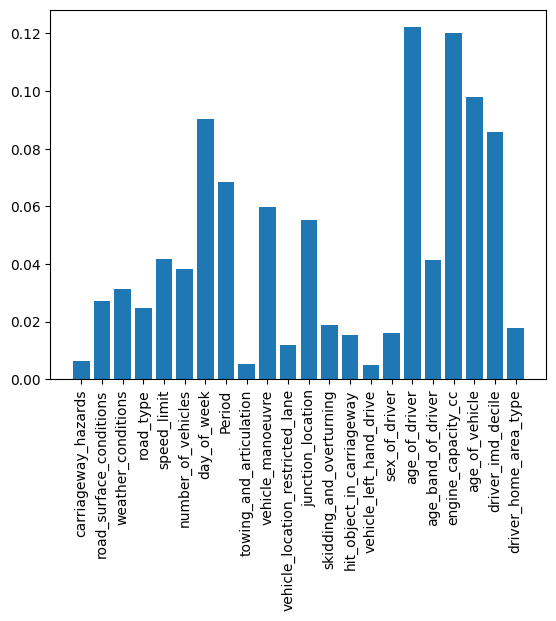

In [ ]:
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.xticks(range(len(importance_rf)), data_df.columns, rotation='vertical')
plt.show();

In [ ]:
Y_pred_rf = random_forest.predict(X_test)
acc_forest_2 = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_forest_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


79.44

dropping more unimportant columns

In [ ]:
X_train.drop(['towing_and_articulation','vehicle_location_restricted_lane','vehicle_left_hand_drive','carriageway_hazards'],inplace = True, axis = 1)
X_test.drop(['towing_and_articulation','vehicle_location_restricted_lane','vehicle_left_hand_drive','carriageway_hazards'],inplace = True, axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
target.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3    133134
2     31764
1      2432
Name: accident_severity, dtype: int64

Addressing Class Imbalance

Upon conducting Exploratory Data Analysis (EDA), it became evident that the dataset exhibited a significant class imbalance. This phenomenon arises from the infrequent occurrence of Fatal accidents in comparison to the other two categories(Serious and Slight). Consequently, there is a scarcity of data for these class. To mitigate this issue, we implemented the Synthetic Minority Over-sampling Technique (SMOTE), which is recognized as one of the most effective methods for handling imbalanced datasets. This approach involves generating synthetic samples to rebalance the class distribution.

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
x_train_resampled,y_train_resampled = SMOTE().fit_resample(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#after upsampling
y_train_resampled.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2    106548
3    106548
1    106548
Name: accident_severity, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Trying out different classification models to select model with highest accuracy

In [ ]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


83.9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


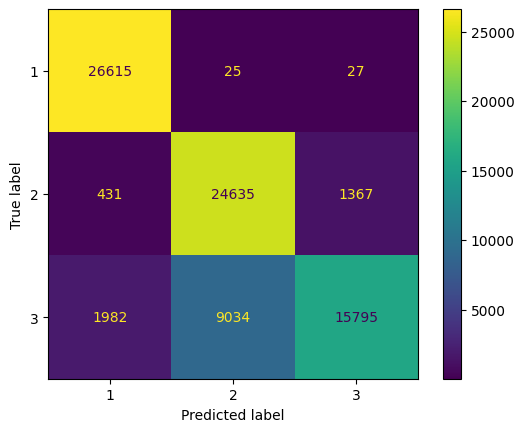

In [ ]:

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



cm = confusion_matrix(y_test, Y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

plt.show()

In [ ]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_dt = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_dt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


81.61

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


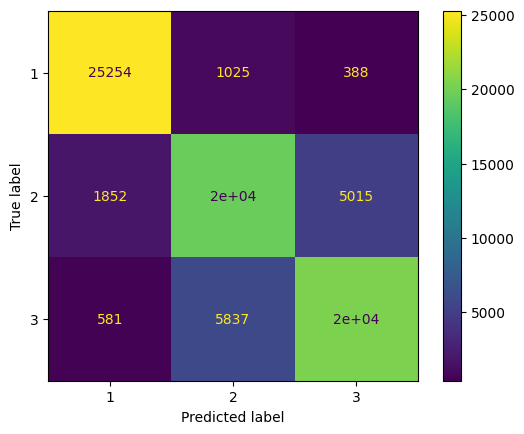

In [ ]:
cm = confusion_matrix(y_test, Y_pred_dt, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=decision_tree.classes_)
disp.plot()

plt.show()

In [ ]:
#Random Forest

forest_2 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1)
forest_2.fit(X_train, y_train)
Y_pred_rf = forest_2.predict(X_test)
acc_forest_2 = round(forest_2.score(X_test, y_test) * 100, 2)
acc_forest_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


90.72

In [ ]:
#Models Score Table

print("Machine Learning model scores:")
models = pd.DataFrame({
    'Model': ['KNN','Random Forest',
              'Decision Tree'],
    'Score': [acc_knn,acc_forest_2, acc_dt]})
models.sort_values(by='Score', ascending=False)

Machine Learning model scores:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Model,Score
1,Random Forest,90.72
0,KNN,83.90
2,Decision Tree,81.61


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


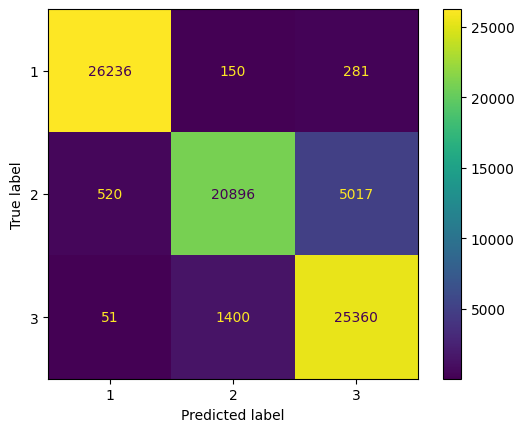

In [ ]:
cm = confusion_matrix(y_test, Y_pred_rf, labels=forest_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest_2.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, Y_pred_rf)
print('Classification Report Random Forest - with Entropy and SMOTE Upsampling: \n', report)

Classification Report Random Forest - with Entropy and SMOTE Upsampling: 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98     26667
           2       0.93      0.79      0.86     26433
           3       0.83      0.95      0.88     26811

    accuracy                           0.91     79911
   macro avg       0.91      0.91      0.91     79911
weighted avg       0.91      0.91      0.91     79911



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The precision, recall, F1 score and accuracy all are at high levels of 0.80+, meaning that the classification is successful and the accuracy of the model is more or less 90% when investigated on multiple metrics.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
forest = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1)

# Create a GridSearchCV object
grid_search = GridSearchCV(forest, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_forest = grid_search.best_estimator_

# Use the best model to make predictions
Y_pred_rf = best_forest.predict(X_test)

# Calculate the accuracy of the best model
acc_forest = round(best_forest.score(X_test, y_test) * 100, 2)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy:", acc_forest)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
